<a href="https://colab.research.google.com/github/2714830587-xh/CLRS-GG/blob/master/Dive_to.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **动手深度学习**

##  3.6 SoftMax_regression

In [ ]:
!pip install d2l

     |████████████████████████████████| 82 kB 566 kB/s 
     |████████████████████████████████| 61 kB 7.5 MB/s 
     |████████████████████████████████| 11.2 MB 29.8 MB/s 
     |████████████████████████████████| 9.9 MB 15.8 MB/s 
     |████████████████████████████████| 899 kB 49.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you h

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.0.0

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
     |████████████████████████████████| 12.8 MB 4.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requi

In [ ]:
import torchvision
from torchvision.transforms import transforms
import torch
from torch import nn
from d2l import torch as d2l
from torch.utils import data
from torch.nn import functional as F
from torch.utils import data
from torchvision import transforms


def load_data_fashion_mnist(batch_size,resize):
  # 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
  # 并除以255使得所有像素的数值均在0到1之间
  trans=[transforms.ToTensor()]
  if resize:
    trans.insert(0,transforms.Resize(resize))
  trans=transforms.Compose(trans)
  mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=True,download=True)
  len(mnist_train)
  mnist_test=torchvision.datasets.FashionMNIST(root="../data",train=False,download=True)
  len(mnist_test)
  return (data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=1),data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=1))
# mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=True,download=True)
# len(mnist_train)
# mnist_test=torchvision.datasets.FashionMNIST(root="../data",train=False,download=True)
# print(len(mnist_test))

# mnist_train中包含60000个数据，第一个0表示其中的第一个数据。每个数据由一张图像和一个label构成。
# 所以第二个0表示其中的图像部分。你可以尝试输出mnist_train[0][1]，你将会得到一个int，表示该图像对应的label。
# print(mnist_train[0][0])


batch_size=256

# mnist_train[index] 是一个 turple。 
# turple 包含图像数据及其标签。因此您需要在第二个方括号中设置 0 或 1 以获取图像数据或其标签
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)


count=0
# 遍历train_iter一下其实就是输出一个batch内的图像和对应的label
for batch_img,label in train_iter:
    print(batch_img.shape,len(label))
    break


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([256, 1, 28, 28]) 256


KeyboardInterrupt: ignored

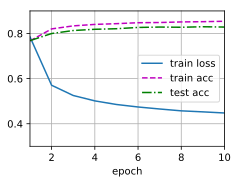

In [ ]:
import torchvision
from torchvision.transforms import transforms
import torch
from torch import nn
from d2l import torch as d2l
from torch.utils import data
from torch.nn import functional as F
from torch.utils import data
from torchvision import transforms
import torch
from IPython import display
from d2l import torch as d2l
# 加载数据
batch_size = 256
def load_data_fashion_mnist(batch_size,resize):
  # 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
  # 并除以255使得所有像素的数值均在0到1之间
  trans=[transforms.ToTensor()]
  if resize:
    trans.insert(0,transforms.Resize(resize))
  trans=transforms.Compose(trans)
  mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=True,transform=torchvision.transforms.ToTensor(),download=True)
  len(mnist_train)
  mnist_test=torchvision.datasets.FashionMNIST(root="../data",train=False,transform=torchvision.transforms.ToTensor(),download=True)
  len(mnist_test)
  return (data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=1),data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=1))
train_iter, test_iter =load_data_fashion_mnist(batch_size,28)
# 遍历train_iter一下其实就是输出一个batch内的图像和对应的label
# for batch_img,label in test_iter:
#     print(batch_img.shape,len(label))
#     break


# 初始化模型参数
num_input=784
num_output=10
w=torch.normal(0,0.01,size=(num_input,num_output),requires_grad=True)
b=torch.zeros(num_output,requires_grad=True)


#定义softmax
x=torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
print(x.sum(0,keepdim=True),x.sum(1,keepdim=True)) 

def softmax(x):
  x_exp=torch.exp(x)
  x_exp_sum=x_exp.sum(1,keepdim=True)
  return x_exp / x_exp_sum
x=torch.normal(0,0.01,(3,6))
x_prob=softmax(x)
print(x_prob,"\n",x_prob.sum(1))


# define model
# -1是用来1填充batch_size,reshape函数将每张原始图像展平为向量
def net(x):
  return softmax(torch.matmul(x.reshape(-1,w.shape[0]),w)+b)



# loss_fn
# y中第一个样本中，第一类是正确的预测,第二个样本第三类是正确的
y=torch.tensor([0,2])
# y_hat，其中包含2个样本在3个类别的预测概率，
y_hat=torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
# 然后使用y作为y_hat中概率的索引,左边的[0,1],表示第0和第1个样本
# y_hat[[0,1],y]
def cross_entropy(y_hat,y):
  return -torch.log(y_hat[range(len(y_hat)),y])
print("cross_entroy:",cross_entropy(y_hat,y))


# 精度
def accuracy(y_hat,y):
  if y_hat.shape[0]>1 and y_hat.shape[1]>1:
    # y_hat=torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
    # y_hat = y_hat.argmax(axis=1)
    # print("y_hat.argmax(axis=1)",y_hat)
    y_hat=y_hat.argmax(axis=1)
    cmp=y_hat.type(y.dtype)==y
    return float(cmp.type(y.dtype).sum())
print("精度:",accuracy(y_hat, y) / len(y))


# 评估net的精度
class Accumulator:  
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
# In [26]: metric = Accumulator(2) 
# In [27]: metric
# Out[27]: <__main__.Accumulator at 0x7f2e4827f820>
# In [28]: metric.data
# Out[28]: [0.0, 0.0]
# In [29]: metric.add(1, 2)
# In [30]: metric.data
# Out[30]: [1.0, 2.0]
def evaluate_accuracy(net, data_iter):  
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]
print("evaluate_accuracy",evaluate_accuracy(net, test_iter))





# train一次
# input:net, train_iter, loss, updater,    ..注意它传入net,train_iter,loss结构,和优化器
# output:训练损失和训练精度
def train_epoch(net,trian_iter,loss,updater):
  if isinstance(net,torch.nn.Module):
    net.train()
  metrix=Accumulator(3)
  for x,y in train_iter:
    y_hat=net(x)
    l=loss(y_hat,y)
    if isinstance(updater,torch.optim.Optimizer):
      # 使用PyTorch内置的优化器和损失函数
      updater.zero_grad()
      l.mean().backward()
      updater.step()
    else:
       # 使用定制的优化器和损失函数
       l.sum().backward()
       updater(x.shape[0])
    metrix.add(float(l.sum()),accuracy(net(x),y),y.numel())# accuracy是正确预测数
  # output:训练损失和训练精度
  return metrix[0]/metrix[2],metrix[1]/metrix[2]



# 动画中绘制数据的实用程序类Animator
class Animator:  
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)


# 实现完整的训练函数
# input:net, train_iter, test_iter, loss, num_epochs, updater
# output:图上
def train(net, train_iter, test_iter, loss, num_epochs, updater):
  animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
  for epoch in range(num_input):
    train_metrix=train_epoch(net,train_iter,loss,updater)
    test_acc=evaluate_accuracy(net,test_iter)
    animator.add(epoch+1,train_metrix+(test_acc,))
  train_loss, train_acc = train_metrix
  assert train_loss < 0.5, train_loss
  assert train_acc <= 1 and train_acc > 0.7, train_acc
  assert test_acc <= 1 and test_acc > 0.7, test_acc


# updater
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent.`"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
lr=0.1
def updater(batch_size):
  return d2l.sgd([w,b],lr,batch_size)

# 训练过程显示
num_epochs = 10
train(net, train_iter, test_iter, cross_entropy, num_epochs, updater)


##  3.7  Soft_MAX简洁实现


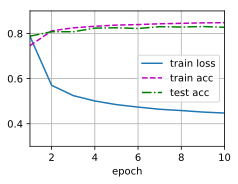

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

# apply 函数将递归搜索网络中的所有模块，并在每个模块上调用该函数。 因此，您在模型中拥有的所有线性层都将使用这一调用进行初始化
net.apply(init_weights);


# 损失函数
# Softmax的实现
# CrossEntropyLoss这个函数里面包含了SoftMax思想,
loss = nn.CrossEntropyLoss(reduction='none')

# 优化算法
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

# 训练
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 测试多少batch是比较合适的，画出图像

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


123.85
63.96
41.83
32.24
26.91
23.53
20.76
18.79
17.51
16.09
14.97
14.15
13.31
12.94
12.77
11.77
11.48
11.12
10.74
10.45
10.47
9.91
9.57
9.55
9.27
9.02
8.77
8.57
8.51
8.37
8.30
8.21
8.22
7.98
7.76
7.79
7.74
7.60
7.53
7.56
7.50
7.38
7.24
7.16
7.17
7.11
7.10
7.04
7.02
6.93
6.91
6.86
6.82
6.84
7.02
6.77
6.73
6.63
6.61
6.59
6.57
6.53
6.47
6.56
6.50
6.46
6.53
6.39
6.44
6.45
6.40
6.40
6.35
6.30


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

6.78


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

7.12


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
Traceback (most recent call last):
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

7.13


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

7.16


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    self._shutdown_workers()
    if w

6.97


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff91d125680>
    

7.14
6.28
6.17
6.19
6.22
6.18
6.16
6.12
6.15
6.15
6.17
6.03
6.05
6.07
6.02
6.02
6.03
6.00
6.02
5.96
5.94
5.90
6.01
5.97
5.97
5.95
5.89
5.91
5.89
5.87
5.87
5.82
5.87
5.80
5.81
5.80
5.81
5.78
5.78
5.81
5.75
5.79
5.74
5.74
5.71
5.76
5.71
5.69
5.74
5.75
5.67
5.68
6.09
5.60
5.66
5.64
5.71
5.61
5.63
5.63
5.63
5.60
5.64
5.65
5.66
5.60
5.66
5.66
5.59
5.61
5.57
5.58
5.55
5.52
5.65
5.64
5.60
5.58
5.58
5.53
5.55
5.52
5.54
5.52
5.51
5.50
5.51
5.46
5.57
5.48
5.46
5.44
5.49
5.46
5.47
5.40
5.52
5.46
5.47
5.48
5.41
5.42
5.43
5.41
5.37
5.42
5.41
5.46
5.41
5.45
5.37
5.42
5.39
5.41
5.38
5.41
5.35
5.43
5.40
5.37
5.35
5.39
5.42
5.39
5.39
5.39
5.34
5.40
5.34
5.42
5.37
5.35
5.35
5.43
5.43
5.37
5.39
5.38
5.34
5.43
5.37
5.27
5.35
5.26
5.33
5.34
5.31
5.27
5.34
5.27
5.30
5.35
5.34
5.28
5.32
5.31
5.31
5.30
5.33
5.35
5.37
5.26
5.27
5.27
5.25
5.25
5.30
5.28
5.28
5.29
5.31
5.24
5.31
5.26
5.24
5.26


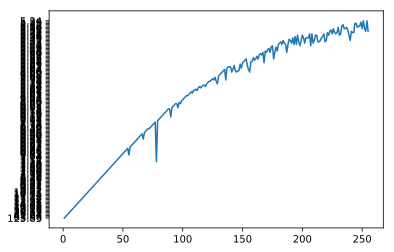

In [ ]:
import matplotlib.pyplot as plt
a = range(1,256)
c=[]
for i in a:
  train_iter,test_iter=d2l.load_data_fashion_mnist(i)
  timer=d2l.Timer()
  for X,y in train_iter:
    continue
  b='%.2f' % timer.stop()    
  print (b)
  c.append(b)
plt.plot(a,c)

###  测试多少num_worker是比较合适的，画出图像??why

1.02
0.93


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.97


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


1.03


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


1.08


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


1.10


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 7 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


1.14


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


1.18


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 9 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


1.22


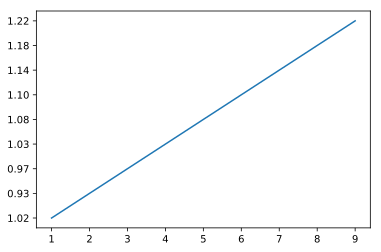

In [ ]:
import torchvision
from torchvision.transforms import transforms
import torch
from torch import nn
from d2l import torch as d2l
from torch.utils import data
from torch.nn import functional as F
from torch.utils import data
from torchvision import transforms
import torch
from IPython import display
from d2l import torch as d2l
# 加载数据
batch_size = 256
def load_data_fashion_mnist(batch_size,resize):
  # 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
  # 并除以255使得所有像素的数值均在0到1之间
  trans=[transforms.ToTensor()]
  if resize:
    trans.insert(0,transforms.Resize(resize))
  trans=transforms.Compose(trans)
  mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=True,transform=torchvision.transforms.ToTensor(),download=True)
  len(mnist_train)
  mnist_test=torchvision.datasets.FashionMNIST(root="../data",train=False,transform=torchvision.transforms.ToTensor(),download=True)
  len(mnist_test)
  return (data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=1),data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=1))
train_iter, test_iter =load_data_fashion_mnist(batch_size,28)
n = range(1,10)
c=[]
batch_size = 256
mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=False,transform=torchvision.transforms.ToTensor(),download=True)
for i in n:
  train_iter=data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=i)
  timer=d2l.Timer()
  for img,label in train_iter:
    continue
  b='%.2f' % timer.stop()    
  print (b)
  c.append(b)
plt.plot(n,c)

## 4.1多层感知机


1.  感知机是一个二分类问题,无法解决XOR,很多层感知机也是一个线性y=AW+b,激活函数可以引入了非线性,RuLu最棒的激活函数,singmoid,tanh里面有指数运算,再计算式很慢
2.  超参数:隐藏层数和隐藏层大小,lr,num_epoch---如何找到最优解-有点像老中医,很难找到
1.如果实验深度和宽度找最优解.比如input:128->output:2  
first:不考虑hidden layer,128->2
second:只考虑一层hidden layer:128->8/16/32/64->2
third:再第二考虑好的情况下(选16,32),多来一层,128->16/32->16/32->2
.....
2. 解决超参数-网格搜索可能是一个很好的方法。 以指数方式增加值。 也许尝试二进制搜索。 这个想法不是线性的，而是按对数的顺序。  





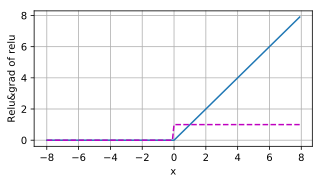

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

x=torch.arange(-8,8,0.1,requires_grad=True)
y=torch.relu(x)
y.sum().backward()
d2l.plot(x.detach(),(y.detach(),x.grad),"x","Relu&grad of relu",figsize=(5,2.5))

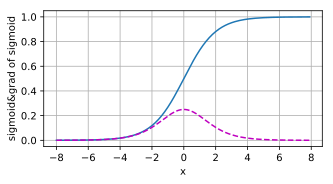

In [ ]:
x.grad.data.zero_()
y=torch.sigmoid(x)
y.sum().backward()
d2l.plot(x.detach(),(y.detach(),x.grad),"x","sigmoid&grad of sigmoid",figsize=(5,2.5))

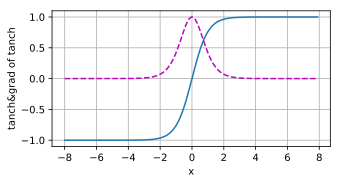

In [ ]:
y=torch.tanh(x)
x.grad.data.zero_()
y.sum().backward()
d2l.plot(x.detach(),(y.detach(),x.grad),"x","tanch&grad of tanch",figsize=(5,2.5))

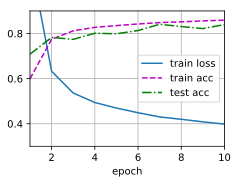

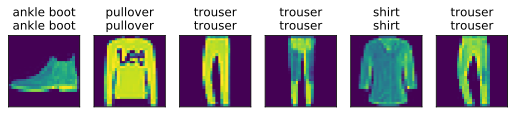

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l


# 加载数据
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)
train_iter.num_workers=2
test_iter.num_workers=2

# 初始化模型参数
num_inputs,num_outputs,num_hiddens=784,10,64
w1=nn.Parameter(torch.randn(num_inputs,num_hiddens,requires_grad=True)*0.01)
b1=nn.Parameter(torch.zeros(num_hiddens,requires_grad=True))
w2=nn.Parameter(torch.randn(num_hiddens,num_outputs,requires_grad=True)*0.01)
b2=nn.Parameter(torch.zeros(num_outputs))
params=[w1,b1,w2,b2]


# 激活函数
def relu(x):
  a=torch.zeros_like(x)
  return torch.max(a,x)


#定义模型
def net(x):
  x=x.reshape(-1,num_inputs)
  H1=relu((x@w1)+b1)  # 这里“@”代表矩阵乘法
  return ((H1@w2)+b2)


# loss
loss=nn.CrossEntropyLoss(reduction='none')


# 定义优化器
lr=0.1
updater=torch.optim.SGD(params,lr=lr)

# train  --为啥没loss
num_epochs=10
# 你debug进代码查看loss值，会发现loss的值很小，大概小数点后三(0.001),所以在图形上无法辨认
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,updater)

d2l.predict_ch3(net, test_iter)

##  4.2 多层感知机简洁实现

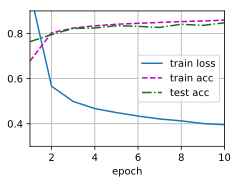

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

# 加载数据
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

# 定义模型
net=nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.Tanh(),nn.Linear(256,10))
def init_weights(m):
  if type(m)==nn.Linear:
    nn.init.normal(m.weight,std=0.01)
    #m.weight在与x做torch.mtamul,可能X*W.T具体看源码
    print(m.weight.shape)
# nn.Linear的weight和bias会自动初始化，这里使用init_weight只是不希望采用对weight的默认初始化，对bias采用默认初始化就可以
net.apply(init_weights) 

# loss 和optimiser
lr=0.1
# reduction ( string , optional ) – 指定要应用于输出的缩减： 'none'| 'mean'| 'sum'. 'none'：不应用减少，'mean'：取输出的加权平均值， 'sum'：输出将被求和。
loss=nn.CrossEntropyLoss(reduction='none')
optimizer=torch.optim.SGD(net.parameters(),lr=lr)


# train
num_epochs=10
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,optimizer)

### with practice
1. 计算pReLU激活函数的导数。
1. 证明一个仅使用ReLU（或pReLU）的多层感知机构造了一个连续的分段线性函数。
1. 证明$\operatorname{tanh}(x) + 1 = 2 \operatorname{sigmoid}(2x)$。
1. 假设我们有一个非线性单元，将它一次应用于一个小批量的数据。你认为这会导致什么样的问题？


1. 在所有其他参数保持不变的情况下，更改超参数`num_hiddens`的值，并查看此超参数的变化对结果有何影响。确定此超参数的最佳值。
1. 尝试添加更多的隐藏层，并查看它对结果有何影响。
1. 改变学习速率会如何影响结果？保持模型架构和其他超参数（包括轮数）不变，学习率设置为多少会带来最好的结果？
1. 通过对所有超参数（学习率、轮数、隐藏层数、每层的隐藏单元数）进行联合优化，可以得到的最佳结果是什么？
  我们如何定义最佳结果？ 是测试数据集上的最小测试损失还是最大准确度？ 我们是否保持时代不变？
1. 描述为什么涉及多个超参数更具挑战性。
  ans:**优化多个超参数很困难，因为优化函数不一定是凸的，并且敏感性研究需要大量计算时间来运行多个训练,如果我们有多个超参数，那么所有参数的混合搭配将创建指数数量的参数来优化**。
1. 如果要构建多个超参数的搜索方法，你能想到的最聪明的策略是什么？
ans**:网格搜索可能是一个很好的方法。 以指数方式增加值。 也许尝试二进制搜索。 这个想法不是线性的，而是按对数的顺序。**

1. 尝试添加不同数量的隐藏层（也可以修改学习率），怎么样设置效果最好？
1. 尝试不同的激活函数，哪个效果最好？
1. 尝试不同的方案来初始化权重，什么方法效果最好？

In [ ]:
# Q1 EASY
# Q2 绘制出RELU(x)的图像后，我们可以发现，如果输出值经过下一层隐藏层的计算，如果＜0则这个数据被舍弃。相当于一个状态在某一层中会被筛选，而被筛选的条件由下一层隐藏层决定，然而这个状态是连续的，因此就会产生类似于分段的效果。
# Q3 
z = torch.tensor([1.0,1.5,2.], dtype=float)
b = torch.tanh(z)+1.0
c = 2.0*torch.sigmoid(2.0*z)
print(b.data,c.data)

tensor([1.7616, 1.9051, 1.9640], dtype=torch.float64) tensor([1.7616, 1.9051, 1.9640], dtype=torch.float64)


## 4.4模型选择欠拟合和过拟合


(200, 20)


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


29.34464612007141 19.820705127716064
weight: [[3.2776294]]
9.692418313026428 5.871062827110291
weight: [[2.6787126 4.068766 ]]
4.382171165943146 4.4775847554206845
weight: [[ 4.5545435  4.0954185 -3.1014042]]
0.00013454468353302218 9.164011426037178e-05
weight: [[ 4.9998703  1.1991742 -3.4005308  5.5995154]]
0.0030445072799921034 0.00441016562981531
weight: [[ 4.9480586  1.190175  -3.2090547  5.618393  -0.4169733]]
0.008279014192521573 0.00737418862991035
weight: [[ 4.916617   1.3087329 -3.1194239  5.014804  -0.6214391  1.6778023]]
0.007722965232096613 0.00704989223740995
weight: [[ 4.919599    1.307885   -3.1272008   5.0214257  -0.61998874  1.6569287
   0.08926564]]
0.007512507773935795 0.006727396231144667
weight: [[ 4.9247513   1.3102561  -3.1550086   5.0078273  -0.47597635  1.6823118
  -0.33946356  0.05716798]]
0.006404024339281023 0.00618357197381556
weight: [[ 4.92667     1.2994308  -3.1481318   5.074593   -0.6030872   1.4292266
   0.21852824  0.4766591   0.17529629]]
0.007020895

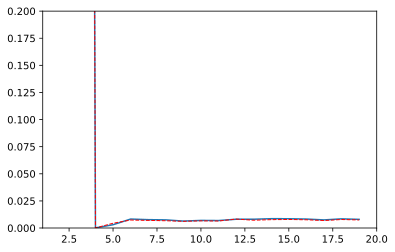

In [ ]:
from numpy.core.fromnumeric import size
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt


max_degree=20
n_train,n_test=100,100
true_w=np.zeros(max_degree)
true_w[0:4]=np.array([5, 1.2, -3.4, 5.6])
features=np.random.normal(size=(n_train+n_test,1))
np.random.shuffle(features)
# print(features.shape)
# np.arange(max_degree).reshape(1, -1).shape
poly_features=np.power(features,np.arange(max_degree).reshape(1,-1))
print(poly_features.shape)
for i in range(max_degree):
  poly_features[:,i]/=math.gamma(i+1)# gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels=np.dot(poly_features,true_w)
labels+=np.random.normal(scale=0.01,size=labels.shape)

# numpy 转换为tensor
true_w,features,poly_features,labels=[torch.tensor(x,dtype=torch.float32) for x in [true_w,features,poly_features,labels]]
features[:2],poly_features[:2,:],labels[:2]

def evaluate_loss(net,data_iter,loss):
  metric=d2l.Accumulator(2)
  for x,y in data_iter:
    out=net(x)
    y=y.reshape(out.shape)
    l=loss(out,y)
    metric.add(l.sum(),l.numel())
  return metric[0]/metric[1]

c=[]
d=[]
def train(train_features,test_features,train_labels,test_lables,num_epochs=400):
  loss=nn.MSELoss(reduce="none")
  input_shape=train_features.shape[-1]
  #不需要偏置在开始已经弄了
  net=nn.Sequential(nn.Linear(input_shape,1,bias=False))
  batch_size=min(10,train_labels.shape[0])
  train_iter=d2l.load_array((train_features,train_labels.reshape(-1,1)),batch_size)
  test_iter=d2l.load_array((test_features,test_lables.reshape(-1,1)),batch_size,is_train=False)
  trainer=torch.optim.SGD(net.parameters(),lr=0.01)
  # animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
  #                           xlim=[1, num_epochs], ylim=[1e-3, 1e2],
  #                           legend=['train', 'test'])                          
  for epoch in range(num_epochs):
    d2l.train_epoch_ch3(net,train_iter,loss,trainer)
    # if epoch==0 or (epoch+1)%20==0:
    #   animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
    #                 evaluate_loss(net, test_iter, loss)))
    if epoch==399:
        print(evaluate_loss(net, train_iter, loss),evaluate_loss(net, test_iter, loss))
        c.append(evaluate_loss(net, train_iter, loss))
        d.append(evaluate_loss(net, test_iter, loss))
  # return  evaluate_loss(net, train_iter, loss),evaluate_loss(net, test_iter, loss)
  print('weight:', net[0].weight.data.numpy())


# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
# 选择最佳维度
a = range(1,20)
for i in a:
  train(poly_features[:n_train, :i], poly_features[n_train:, :i],
      labels[:n_train], labels[n_train:])
plt.xlim((1, 20))
plt.ylim((0, 0.2))
plt.plot(a,c,label='train')
plt.plot(a,d, color='red', linewidth=1.0, linestyle='--',label='test')
plt.show()
  # animator = d2l.Animator(xlabel='num_featurenum_feature', ylabel='loss', yscale='log',
  #                           xlim=[2, 20], ylim=[1e-3, 1e2],
  #                           legend=['train', 'test'])
  # animator.add(i + 1, (train,test))
  
# train(poly_features[:n_train, :8], poly_features[n_train:, :8],
#       labels[:n_train], labels[n_train:])
# train(poly_features[:n_train, :16], poly_features[n_train:, :16],
#       labels[:n_train], labels[n_train:])
# # 从多项式特征中选择前2个维度，即1和x
# train(poly_features[:n_train, :2], poly_features[n_train:, :2],
#       labels[:n_train], labels[n_train:])
# # 从多项式特征中选取所有维度
# train(poly_features[:n_train, :], poly_features[n_train:, :],
#       labels[:n_train], labels[n_train:], num_epochs=1500)

## 4.5权重衰减

torch.Size([20, 200]) torch.Size([20, 1])
wd的值: 0   w的L2范数： 14.037468910217285
wd的值: 1   w的L2范数： 5.747180461883545
wd的值: 2   w的L2范数： 4.233137130737305
wd的值: 3   w的L2范数： 3.933711528778076
wd的值: 4   w的L2范数： 3.8130483627319336
wd的值: 5   w的L2范数： 3.681896448135376
wd的值: 6   w的L2范数： 3.5699644088745117
wd的值: 7   w的L2范数： 3.452233076095581
wd的值: 8   w的L2范数： 3.362382650375366
wd的值: 9   w的L2范数： 3.2759296894073486
wd的值: 10   w的L2范数： 3.2127764225006104
wd的值: 11   w的L2范数： 3.0976643562316895
wd的值: 12   w的L2范数： 3.0167884826660156
wd的值: 13   w的L2范数： 2.9428470134735107
wd的值: 14   w的L2范数： 2.8816120624542236
wd的值: 15   w的L2范数： 2.823699474334717
wd的值: 16   w的L2范数： 2.7587027549743652
wd的值: 17   w的L2范数： 2.654435396194458
wd的值: 18   w的L2范数： 2.6435153484344482
wd的值: 19   w的L2范数： 2.550482988357544
wd的值: 20   w的L2范数： 2.518390417098999
wd的值: 21   w的L2范数： 2.466092109680176
wd的值: 22   w的L2范数： 2.415374755859375
wd的值: 23   w的L2范数： 2.3906073570251465
wd的值: 24   w的L2范数： 2.3309640884399414
wd的值: 25   w的L2范数： 2.295504093

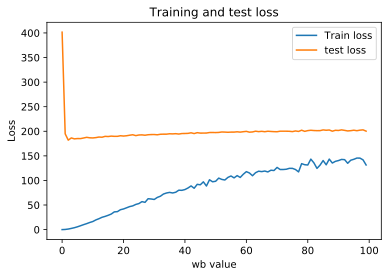

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt

n_train,n_test,num_inputs,batch_size=20,100,200,5
true_w,true_b=torch.ones((num_inputs,1)),0.05
train_data=d2l.synthetic_data(true_w,true_b,n_train)#这个函数返回两个值,X,Y
print(train_data[0].shape,train_data[1].shape)
train_iter=d2l.load_array(train_data,batch_size,is_train=True)
test_data=d2l.synthetic_data(true_w,true_b,n_test)
test_iter=d2l.load_array(test_data,batch_size,is_train=False)

# init_params [w,b] ???啥意思
def init_params():
  w=torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
  b=torch.zeros(1,requires_grad=True)
  return [w,b]
# w,b=init_params()
# print(w.shape,b.shape)



# 定义L2的范数惩罚
def l2_penalty(w):
  return torch.sum(w.pow(2))/2 #w.pow(2)==w**2

train_loss = []
val_loss = []
# 训练代码
def train(lambd):
  w,b=init_params()
  net,loss=lambda x: d2l.linreg(x,w,b),d2l.squared_loss
  num_epochs,lr=100,0.003
  animater=d2l.Animator(xlabel="epochs",ylabel="loss",yscale="log",xlim=[55,num_epochs],legend=["train","test"])
  for epoch in range(num_epochs):
    for x,y in train_iter:
      l=loss(net(x),y)+lambd*l2_penalty(w)
      l.sum().backward()
      d2l.sgd([w,b],lr,batch_size)
    if(epoch+1)%5==0:
      animater.add(epoch+1,(d2l.evaluate_loss(net,train_iter,loss),
                            d2l.evaluate_loss(net,test_iter,loss)))
  print("w的L2范数:",torch.norm(w).item())
# train(lambd=0)
# train(lambd=1)
# train(lambd=2)






# 简单实现
train_loss = []
test_loss = []
def train_concise(wd):
  net=nn.Sequential(nn.Linear(num_inputs,1))
  for param in net.parameters():
    param.data.normal_()
  loss=nn.MSELoss(reduction="none")
  num_epochs,lr=100,0.003
  trainer=torch.optim.SGD([
          {"params":net[0].weight,"weight_decay":wd},
          {"params":net[0].bias}],lr=lr)
  # animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
  #                           xlim=[5, num_epochs], legend=['train', 'test'])
  for epoch in range(num_epochs):
    for x,y in train_iter:
      trainer.zero_grad()
      l=loss(net(x),y)
      l.mean().backward()
      trainer.step()
  train_loss.append(d2l.evaluate_loss(net,train_iter,loss))
  test_loss.append(d2l.evaluate_loss(net,test_iter,loss))
    # if (epoch+1)%5==0:
    #   animator.add(epoch+1,(d2l.evaluate_loss(net,train_iter,loss),d2l.evaluate_loss(net,test_iter,loss)))
  print("wd的值:",wd,'  w的L2范数：', net[0].weight.norm().item())
# train_concise(0)
# train_concise(100)
a=range(100)
for i in a:
 train_concise(i)
plt.plot(range(len(train_loss)), train_loss, label='Train loss')
plt.plot(range(len(test_loss)), test_loss, label='test loss')
plt.xlabel("wb value")
plt.ylabel("Loss")
plt.title("Training and test loss")
plt.legend()
plt.show()

## 4.6 Dropout

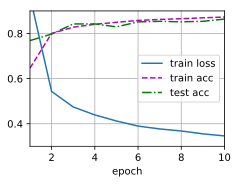

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))




# define model
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256
dropout1,dropout2=0.2,0.5
# class Net(nn.Module):
#   def __init__(self,num_inputs,num_outputs,num_hiddens1,num_hiddens2,is_train=True):
#       super(Net,self).__init__()
#       self.num_inputs=num_inputs
#       # self.num_outputs=num_outputs
#       self.train=is_train
#       self.lin1=nn.Linear(num_inputs,num_hiddens1)
#       self.lin2=nn.Linear(num_hiddens1,num_hiddens2)
#       self.lin3=nn.Linear(num_hiddens2,num_outputs)
#       self.relu=nn.ReLU()
  

#   def forward(self,x):
#     x=self.relu(self.lin1(x.reshape((-1,self.num_inputs))))
#     if self.train==True:
#       x=dropout_layer(x,dropout1)
#     x=self.relu(self.lin2(x))
#     if self.train==True:
#       x=dropout_layer(x,dropout2)
#     x=self.lin3(x)
#     return x
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)


# test model
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)
x=torch.randn(64,28,28)#x=torch.randn(64,1,28,28)
print(net(x).shape)


num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)


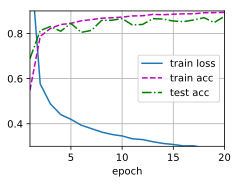

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
dropout1, dropout2 = 0.2, 0.5
net=nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.ReLU(),nn.Dropout(dropout1),nn.Linear(256,256),nn.ReLU(),nn.Dropout(),nn.Linear(256,10))
def init_weights(m):
  if type(m)==nn.Linear:
    nn.init.normal_(m.weight,std=0.01)
net.apply(init_weights)

num_epochs, lr, batch_size = 20, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
trainer=torch.optim.SGD(net.parameters(),lr=0.5)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

## 4.7 kaggle 比赛-对照组

('train_data.shape', (47439, 41), 'test_data.shape', (31626, 40))
Sold Price
all_features.shape (79065, 36)
Type                               0
Year built                      1942
Heating                        11513
Cooling                        15109
Parking                         1676
Lot                            22989
Bedrooms                        4598
Bathrooms                       5410
Full bathrooms                 12928
Total interior livable area     3878
Total spaces                    1667
Garage spaces                   1667
Region                             2
Elementary School               8493
Elementary School Score         8735
Elementary School Distance      8493
Middle School                  28277
Middle School Score            28279
Middle School Distance         28277
High School                     7174
High School Score               7784
High School Distance            7175
Flooring                       21927
Heating features               12548
Cool

100%|██████████| 593/593 [00:07<00:00, 75.12it/s]


折1，训练log rmse0.618759, 验证log rmse0.590047


100%|██████████| 593/593 [00:09<00:00, 60.29it/s]


折2，训练log rmse0.431990, 验证log rmse0.431548


100%|██████████| 593/593 [00:09<00:00, 60.33it/s]


折3，训练log rmse0.423516, 验证log rmse0.434958


100%|██████████| 593/593 [00:09<00:00, 59.99it/s]


折4，训练log rmse0.455327, 验证log rmse0.499514


100%|██████████| 593/593 [00:10<00:00, 56.53it/s]


折5，训练log rmse0.363482, 验证log rmse0.430920
保存成功
5-折验证: 平均训练log rmse: 0.458615, 平均验证log rmse: 0.477397


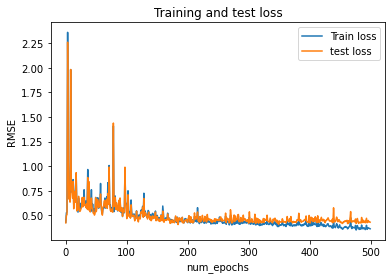

In [30]:
import pandas as pd
import numpy as np
#导入csv数据
import torch
import torch.nn as nn
from torch.utils import data
import matplotlib.pyplot as plt
from tqdm import tqdm#引入进度条

device=torch.device("cuda"if torch.cuda.is_available() else "cpu")
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv("/content/test.csv")
print(("train_data.shape",train_data.shape,"test_data.shape",test_data.shape))


# 看数据差距
[print(i) for i in train_data.columns if i  not in test_data.columns]


# 数据预处理->内存有限，需要选择好哪些特征,
# State都是CA;Summary是文本数据，分析有限就直接剔除，同理Address
all_features=pd.concat((train_data.iloc[:,4:-1],test_data.iloc[:,3:-1]))
# print(train_data.columns)->看一下那些列
print("all_features.shape",all_features.shape)


# 先看一下那些列有缺失值
miss_values_count=all_features.isnull().sum()
print(miss_values_count)
print(miss_values_count.loc[miss_values_count>0])



#缺失数据所占比例,缺失数据填零,和检测数据是否都NA都去掉了
total_data=np.product(all_features.shape)
miss_total=miss_values_count.sum()
print("miss_percent:",miss_total/total_data*100)
all_features = all_features.fillna(method='bfill', axis=0).fillna(0)
miss_values_count=all_features.isnull().sum()
print(miss_values_count.loc[miss_values_count>0])



# all_features中的数据有哪些类型,不是数值类型的取哪些
print(all_features.dtypes.unique())
print(all_features.dtypes[all_features.dtypes=='object'])
# 不是数值类型的数据unique数量
for in_object in all_features.dtypes[all_features.dtypes=='object'].index:
    print(in_object.ljust(20),len(all_features[in_object].unique()))#返回单词“banana”的 20 个字符长的左对齐版本：
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
features = list(numeric_features)
print(features)
features.extend(["Type","Cooling","Bedrooms"])
print(features)
all_features = all_features[features]
print(all_features.shape)
all_features = pd.get_dummies(all_features, dummy_na=True)
print(all_features.shape)


# to_tensor
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)
train_labels = torch.tensor(train_data['Sold Price'].values.reshape(-1,1), dtype=torch.float32)



in_features = train_features.shape[1]
class MLP(nn.Module):
    def __init__(self,in_features):
        super(MLP, self).__init__()
        self.model=nn.Sequential(
            nn.Linear(in_features,256),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(256,64),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(64,1)
        )
    def forward(self, x):
        x=self.model(x)
        return x

net=MLP(in_features=in_features).to(device)
# x=torch.randn(45664,in_features)
# print(net(x).shape)
# def get_net():
#     net = nn.Sequential(nn.Linear(in_features,512),nn.ReLU(),nn.Dropout(),nn.Linear(512,256),nn.ReLU(),nn.Dropout(),nn.Linear(256,128),nn.ReLU(),nn.Dropout(),nn.Linear(128,64),nn.ReLU(),nn.Dropout(),nn.Linear(64,32),nn.ReLU(),nn.Dropout(),nn.Linear(32,1))
#     return net
loss = nn.MSELoss()
# log_rmse
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

# 训练
train_ls, test_ls = [], []
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):

    train_iter = load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in tqdm(train_iter):
            X=X.to(device)
            y=y.to(device)
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net.to('cpu'), train_features, train_labels))#注意cpu
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

# k折交叉验证
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]  
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
        if i==k-1:
          torch.save(net.state_dict(), "my_net{}.pth".format(i))
          print("保存成功")
    return train_l_sum / k, valid_l_sum / k

# 开始训练
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 0.1, 0.1, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')
plt.plot(range(len(train_ls)), train_ls, label='Train loss')
plt.plot(range(len(test_ls)), test_ls, label='test loss')
plt.xlabel("num_epochs")
plt.ylabel("RMSE")
plt.yscale = 'log'
plt.title("Training and test loss")
plt.legend()
plt.show()

('train_data.shape', (47439, 41), 'test_data.shape', (31626, 40))
cuda
Sold Price
all_features.shape (79065, 36)
Type                               0
Year built                      1942
Heating                        11513
Cooling                        15109
Parking                         1676
Lot                            22989
Bedrooms                        4598
Bathrooms                       5410
Full bathrooms                 12928
Total interior livable area     3878
Total spaces                    1667
Garage spaces                   1667
Region                             2
Elementary School               8493
Elementary School Score         8735
Elementary School Distance      8493
Middle School                  28277
Middle School Score            28279
Middle School Distance         28277
High School                     7174
High School Score               7784
High School Distance            7175
Flooring                       21927
Heating features               12548

100%|██████████| 371/371 [00:00<00:00, 500.32it/s]


折1，训练log rmse0.480620, 验证log rmse0.506042


100%|██████████| 371/371 [00:00<00:00, 500.92it/s]


折2，训练log rmse0.384425, 验证log rmse0.465063
保存成功
xh_train_l 0.4325221925973892 xh_valid_l 0.4855523407459259


100%|██████████| 495/495 [00:00<00:00, 521.28it/s]


折1，训练log rmse0.567962, 验证log rmse0.537471


100%|██████████| 495/495 [00:00<00:00, 520.02it/s]


折2，训练log rmse0.449568, 验证log rmse0.477707


100%|██████████| 495/495 [00:00<00:00, 530.22it/s]


折3，训练log rmse0.374748, 验证log rmse0.442518
保存成功
xh_train_l 0.4640926917394002 xh_valid_l 0.48589842518170673


100%|██████████| 556/556 [00:01<00:00, 519.72it/s]


折1，训练log rmse0.381270, 验证log rmse0.411917


100%|██████████| 556/556 [00:01<00:00, 527.01it/s]


折2，训练log rmse0.387781, 验证log rmse0.399663


100%|██████████| 556/556 [00:01<00:00, 519.11it/s]


折3，训练log rmse0.395313, 验证log rmse0.422424


100%|██████████| 556/556 [00:01<00:00, 536.41it/s]


折4，训练log rmse0.371972, 验证log rmse0.418926
保存成功
xh_train_l 0.3840840607881546 xh_valid_l 0.4132325053215027


100%|██████████| 593/593 [00:01<00:00, 522.97it/s]


折1，训练log rmse0.393646, 验证log rmse0.400151


100%|██████████| 593/593 [00:01<00:00, 527.76it/s]


折2，训练log rmse0.398094, 验证log rmse0.396147


100%|██████████| 593/593 [00:01<00:00, 510.74it/s]


折3，训练log rmse0.402128, 验证log rmse0.405608


100%|██████████| 593/593 [00:01<00:00, 512.89it/s]


折4，训练log rmse0.396906, 验证log rmse0.415081


100%|██████████| 593/593 [00:01<00:00, 524.44it/s]


折5，训练log rmse0.353484, 验证log rmse0.406699
保存成功
xh_train_l 0.38885174989700316 xh_valid_l 0.4047371745109558


100%|██████████| 618/618 [00:01<00:00, 514.43it/s]


折1，训练log rmse0.410607, 验证log rmse0.417248


100%|██████████| 618/618 [00:01<00:00, 503.64it/s]


折2，训练log rmse0.394228, 验证log rmse0.390238


100%|██████████| 618/618 [00:01<00:00, 513.61it/s]


折3，训练log rmse0.387767, 验证log rmse0.382460


100%|██████████| 618/618 [00:01<00:00, 505.87it/s]


折4，训练log rmse0.420353, 验证log rmse0.418462


100%|██████████| 618/618 [00:01<00:00, 512.02it/s]


折5，训练log rmse0.411946, 验证log rmse0.458566


100%|██████████| 618/618 [00:01<00:00, 526.22it/s]


折6，训练log rmse0.367819, 验证log rmse0.420615
保存成功
xh_train_l 0.39878664414087933 xh_valid_l 0.41459810733795166


100%|██████████| 636/636 [00:01<00:00, 525.94it/s]


折1，训练log rmse0.369130, 验证log rmse0.375696


100%|██████████| 636/636 [00:01<00:00, 511.30it/s]


折2，训练log rmse0.386919, 验证log rmse0.374404


100%|██████████| 636/636 [00:01<00:00, 507.61it/s]


折3，训练log rmse0.381477, 验证log rmse0.382737


100%|██████████| 636/636 [00:01<00:00, 504.91it/s]


折4，训练log rmse0.378576, 验证log rmse0.392725


100%|██████████| 636/636 [00:01<00:00, 511.46it/s]


折5，训练log rmse0.378625, 验证log rmse0.410990


100%|██████████| 636/636 [00:01<00:00, 509.22it/s]


折6，训练log rmse0.392813, 验证log rmse0.440482


100%|██████████| 636/636 [00:01<00:00, 504.44it/s]


折7，训练log rmse0.343651, 验证log rmse0.392563
保存成功
xh_train_l 0.3758844605513981 xh_valid_l 0.3956567645072937


100%|██████████| 649/649 [00:01<00:00, 496.27it/s]


折1，训练log rmse0.365014, 验证log rmse0.367053


100%|██████████| 649/649 [00:01<00:00, 503.52it/s]


折2，训练log rmse0.371747, 验证log rmse0.372354


100%|██████████| 649/649 [00:01<00:00, 505.09it/s]


折3，训练log rmse0.370719, 验证log rmse0.369280


100%|██████████| 649/649 [00:01<00:00, 517.79it/s]


折4，训练log rmse0.360250, 验证log rmse0.364597


100%|██████████| 649/649 [00:01<00:00, 500.81it/s]


折5，训练log rmse0.377625, 验证log rmse0.387256


100%|██████████| 649/649 [00:01<00:00, 502.31it/s]


折6，训练log rmse0.358006, 验证log rmse0.386525


100%|██████████| 649/649 [00:01<00:00, 522.88it/s]


折7，训练log rmse0.361162, 验证log rmse0.397744


100%|██████████| 649/649 [00:01<00:00, 489.88it/s]


折8，训练log rmse0.367613, 验证log rmse0.413158
保存成功
xh_train_l 0.366517074406147 xh_valid_l 0.38224591314792633


100%|██████████| 659/659 [00:01<00:00, 515.30it/s]


折1，训练log rmse0.357261, 验证log rmse0.363704


100%|██████████| 659/659 [00:01<00:00, 516.77it/s]


折2，训练log rmse0.362104, 验证log rmse0.371145


100%|██████████| 659/659 [00:01<00:00, 505.33it/s]


折3，训练log rmse0.364054, 验证log rmse0.363669


100%|██████████| 659/659 [00:01<00:00, 498.61it/s]


折4，训练log rmse0.358999, 验证log rmse0.352886


100%|██████████| 659/659 [00:01<00:00, 508.57it/s]


折5，训练log rmse0.372283, 验证log rmse0.370299


100%|██████████| 659/659 [00:01<00:00, 517.12it/s]


折6，训练log rmse0.350671, 验证log rmse0.417077


100%|██████████| 659/659 [00:01<00:00, 519.06it/s]


折7，训练log rmse0.357706, 验证log rmse0.388642


100%|██████████| 659/659 [00:01<00:00, 501.05it/s]


折8，训练log rmse0.349791, 验证log rmse0.374875


100%|██████████| 659/659 [00:01<00:00, 501.64it/s]


折9，训练log rmse0.336316, 验证log rmse0.363066
保存成功
xh_train_l 0.35657622085677254 xh_valid_l 0.3739292356703017


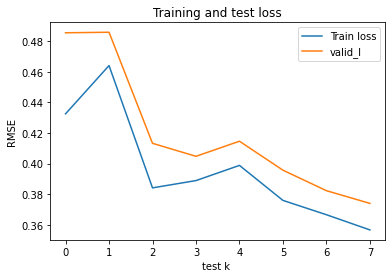

In [5]:
import pandas as pd
import numpy as np
#导入csv数据
import torch
import torch.nn as nn
from torch.utils import data
import matplotlib.pyplot as plt
from tqdm import tqdm#引入进度条

device=torch.device("cuda"if torch.cuda.is_available() else "cpu")
train_data=pd.read_csv('/content/drive/MyDrive/train.csv')
test_data=pd.read_csv("/content/drive/MyDrive/test.csv")
print(("train_data.shape",train_data.shape,"test_data.shape",test_data.shape))
print(device)


# 看数据差距
[print(i) for i in train_data.columns if i  not in test_data.columns]


# 数据预处理->内存有限，需要选择好哪些特征,
# State都是CA;Summary是文本数据，分析有限就直接剔除，同理Address
all_features=pd.concat((train_data.iloc[:,4:-1],test_data.iloc[:,3:-1]))
# print(train_data.columns)->看一下那些列
print("all_features.shape",all_features.shape)


# 先看一下那些列有缺失值
miss_values_count=all_features.isnull().sum()
print(miss_values_count)
print(miss_values_count.loc[miss_values_count>0])



#缺失数据所占比例,缺失数据填零,和检测数据是否都NA都去掉了
total_data=np.product(all_features.shape)
miss_total=miss_values_count.sum()
print("miss_percent:",miss_total/total_data*100)
all_features = all_features.fillna(method='bfill', axis=0).fillna(0)
miss_values_count=all_features.isnull().sum()
print(miss_values_count.loc[miss_values_count>0])



# all_features中的数据有哪些类型,不是数值类型的取哪些
print(all_features.dtypes.unique())
print(all_features.dtypes[all_features.dtypes=='object'])
# 不是数值类型的数据unique数量
for in_object in all_features.dtypes[all_features.dtypes=='object'].index:
    print(in_object.ljust(20),len(all_features[in_object].unique()))#返回单词“banana”的 20 个字符长的左对齐版本：
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
features = list(numeric_features)
print(features)
features.extend(["Type","Cooling","Bedrooms"])
print(features)
all_features = all_features[features]
print(all_features.shape)
all_features = pd.get_dummies(all_features, dummy_na=True)
print(all_features.shape)


# to_tensor
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32,device=device)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32,device=device)
train_labels = torch.tensor(train_data['Sold Price'].values.reshape(-1,1), dtype=torch.float32,device=device)



in_features = train_features.shape[1]
class MLP(nn.Module):
    def __init__(self,in_features):
        super(MLP, self).__init__()
        self.model=nn.Sequential(
            nn.Linear(in_features,256),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(256,64),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(64,1)
        )
    def forward(self, x):
        x=self.model(x)
        return x

net=MLP(in_features=in_features).to(device)
# x=torch.randn(45664,in_features)
# print(net(x).shape)
# def get_net():
#     net = nn.Sequential(nn.Linear(in_features,512),nn.ReLU(),nn.Dropout(),nn.Linear(512,256),nn.ReLU(),nn.Dropout(),nn.Linear(256,128),nn.ReLU(),nn.Dropout(),nn.Linear(128,64),nn.ReLU(),nn.Dropout(),nn.Linear(64,32),nn.ReLU(),nn.Dropout(),nn.Linear(32,1))
#     return net
loss = nn.MSELoss()
# log_rmse
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

# 训练
train_ls, test_ls = [], []
xh_train_loss,xh_test_loss=[],[]
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):

    train_iter = load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in tqdm(train_iter):
            X=X.to(device)
            y=y.to(device)
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))#注意cpu
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

# k折交叉验证
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]  
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
        if i==k-1:
          torch.save(net.state_dict(), "my_net{}.pth".format(i))
          print("保存成功")
    return train_l_sum / k, valid_l_sum / k

# 开始训练
# k, num_epochs, lr, weight_decay, batch_size = 5, 100, 0.1, 0.1, 64
# train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
#                           weight_decay, batch_size)
# print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
#       f'平均验证log rmse: {float(valid_l):f}')
# plt.plot(range(len(train_ls)), train_ls, label='Train loss')
# plt.plot(range(len(test_ls)), test_ls, label='test loss')
# plt.xlabel("num_epochs")
# plt.ylabel("RMSE")
# plt.yscale = 'log'
# plt.title("Training and test loss")
# plt.legend()
# plt.show()
train_l,valid_l=[],[]
test_k=np.arange(2,10)
for i in test_k:
  k, num_epochs, lr, weight_decay, batch_size = i, 100, 0.1, 0.1, 64
  xh_train_l, xh_valid_l=0.0,0.0
  xh_train_l, xh_valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
  print("xh_train_l",xh_train_l,"xh_valid_l",xh_valid_l)
  train_l.append(xh_train_l)
  valid_l.append(xh_valid_l)
plt.plot(range(len(train_l)), train_l, label='Train loss')
plt.plot(range(len(valid_l)), valid_l, label='valid_l')
plt.xlabel("test k ")
plt.ylabel("RMSE")
plt.yscale = 'log'
plt.title("Training and test loss")
plt.legend()
plt.show()

('train_data.shape', (47439, 41), 'test_data.shape', (31626, 40))
Sold Price
all_features.shape (79065, 36)
Type                               0
Year built                      1942
Heating                        11513
Cooling                        15109
Parking                         1676
Lot                            22989
Bedrooms                        4598
Bathrooms                       5410
Full bathrooms                 12928
Total interior livable area     3878
Total spaces                    1667
Garage spaces                   1667
Region                             2
Elementary School               8493
Elementary School Score         8735
Elementary School Distance      8493
Middle School                  28277
Middle School Score            28279
Middle School Distance         28277
High School                     7174
High School Score               7784
High School Distance            7175
Flooring                       21927
Heating features               12548
Cool

100%|██████████| 593/593 [00:01<00:00, 345.48it/s]


折1，训练log rmse0.854789, 验证log rmse0.766562


100%|██████████| 593/593 [00:01<00:00, 345.14it/s]


折2，训练log rmse0.786538, 验证log rmse0.757852


100%|██████████| 593/593 [00:01<00:00, 341.51it/s]


折3，训练log rmse1.045210, 验证log rmse0.985251


100%|██████████| 593/593 [00:01<00:00, 324.05it/s]


折4，训练log rmse0.701667, 验证log rmse0.771330


100%|██████████| 593/593 [00:01<00:00, 351.78it/s]


折5，训练log rmse0.868150, 验证log rmse1.141038
保存成功


100%|██████████| 593/593 [00:01<00:00, 334.78it/s]


折1，训练log rmse1.048643, 验证log rmse1.041296


100%|██████████| 593/593 [00:01<00:00, 335.19it/s]


折2，训练log rmse1.015934, 验证log rmse0.881391


100%|██████████| 593/593 [00:01<00:00, 334.64it/s]


折3，训练log rmse0.775669, 验证log rmse0.837829


100%|██████████| 593/593 [00:01<00:00, 329.52it/s]


折4，训练log rmse0.563018, 验证log rmse0.800797


100%|██████████| 593/593 [00:01<00:00, 345.08it/s]


折5，训练log rmse0.487191, 验证log rmse0.534247
保存成功


100%|██████████| 593/593 [00:01<00:00, 358.48it/s]


折1，训练log rmse0.493606, 验证log rmse0.526437


100%|██████████| 593/593 [00:01<00:00, 331.32it/s]


折2，训练log rmse0.405726, 验证log rmse0.410681


100%|██████████| 593/593 [00:01<00:00, 340.85it/s]


折3，训练log rmse0.419888, 验证log rmse0.429486


100%|██████████| 593/593 [00:01<00:00, 333.10it/s]


折4，训练log rmse0.374577, 验证log rmse0.398164


100%|██████████| 593/593 [00:01<00:00, 323.67it/s]


折5，训练log rmse0.345533, 验证log rmse0.409680
保存成功


100%|██████████| 593/593 [00:01<00:00, 336.06it/s]


折1，训练log rmse0.534218, 验证log rmse0.516253


100%|██████████| 593/593 [00:01<00:00, 349.78it/s]


折2，训练log rmse0.663207, 验证log rmse0.601119


100%|██████████| 593/593 [00:01<00:00, 332.97it/s]


折3，训练log rmse0.494589, 验证log rmse0.499270


100%|██████████| 593/593 [00:01<00:00, 348.09it/s]


折4，训练log rmse0.513609, 验证log rmse0.534951


100%|██████████| 593/593 [00:01<00:00, 316.05it/s]


折5，训练log rmse0.470105, 验证log rmse0.552597
保存成功


100%|██████████| 593/593 [00:01<00:00, 340.03it/s]


折1，训练log rmse1.309798, 验证log rmse1.336690


100%|██████████| 593/593 [00:01<00:00, 326.45it/s]


折2，训练log rmse0.780237, 验证log rmse0.831273


100%|██████████| 593/593 [00:01<00:00, 321.82it/s]


折3，训练log rmse0.894117, 验证log rmse0.960475


100%|██████████| 593/593 [00:01<00:00, 313.89it/s]


折4，训练log rmse0.739694, 验证log rmse0.690655


100%|██████████| 593/593 [00:01<00:00, 324.58it/s]


折5，训练log rmse0.687354, 验证log rmse0.733118
保存成功


100%|██████████| 593/593 [00:01<00:00, 319.19it/s]


折1，训练log rmse1.054142, 验证log rmse1.084829


100%|██████████| 593/593 [00:01<00:00, 328.39it/s]


折2，训练log rmse0.877463, 验证log rmse0.915585


100%|██████████| 593/593 [00:01<00:00, 325.23it/s]


折3，训练log rmse0.809106, 验证log rmse0.821840


100%|██████████| 593/593 [00:01<00:00, 315.89it/s]


折4，训练log rmse0.796957, 验证log rmse0.797124


100%|██████████| 593/593 [00:01<00:00, 332.69it/s]


折5，训练log rmse0.793563, 验证log rmse0.879681
保存成功


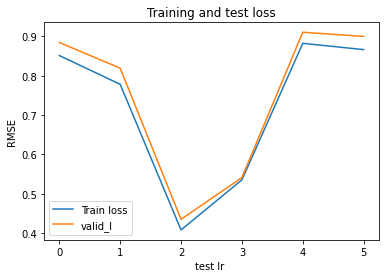

In [4]:
import pandas as pd
import numpy as np
#导入csv数据
import torch
import torch.nn as nn
from torch.utils import data
import matplotlib.pyplot as plt
from tqdm import tqdm#引入进度条

device=torch.device("cuda"if torch.cuda.is_available() else "cpu")
train_data=pd.read_csv('/content/drive/MyDrive/train.csv')
test_data=pd.read_csv("/content/drive/MyDrive/test.csv")
print(("train_data.shape",train_data.shape,"test_data.shape",test_data.shape))


# 看数据差距
[print(i) for i in train_data.columns if i  not in test_data.columns]


# 数据预处理->内存有限，需要选择好哪些特征,
# State都是CA;Summary是文本数据，分析有限就直接剔除，同理Address
all_features=pd.concat((train_data.iloc[:,4:-1],test_data.iloc[:,3:-1]))
# print(train_data.columns)->看一下那些列
print("all_features.shape",all_features.shape)


# 先看一下那些列有缺失值
miss_values_count=all_features.isnull().sum()
print(miss_values_count)
print(miss_values_count.loc[miss_values_count>0])



#缺失数据所占比例,缺失数据填零,和检测数据是否都NA都去掉了
total_data=np.product(all_features.shape)
miss_total=miss_values_count.sum()
print("miss_percent:",miss_total/total_data*100)
all_features = all_features.fillna(method='bfill', axis=0).fillna(0)
miss_values_count=all_features.isnull().sum()
print(miss_values_count.loc[miss_values_count>0])



# all_features中的数据有哪些类型,不是数值类型的取哪些
print(all_features.dtypes.unique())
print(all_features.dtypes[all_features.dtypes=='object'])
# 不是数值类型的数据unique数量
for in_object in all_features.dtypes[all_features.dtypes=='object'].index:
    print(in_object.ljust(20),len(all_features[in_object].unique()))#返回单词“banana”的 20 个字符长的左对齐版本：
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
features = list(numeric_features)
print(features)
features.extend(["Type","Cooling","Bedrooms"])
print(features)
all_features = all_features[features]
print(all_features.shape)
all_features = pd.get_dummies(all_features, dummy_na=True)
print(all_features.shape)


# to_tensor
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32,device=device)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32,device=device)
train_labels = torch.tensor(train_data['Sold Price'].values.reshape(-1,1), dtype=torch.float32,device=device)



in_features = train_features.shape[1]
class MLP(nn.Module):
    def __init__(self,in_features):
        super(MLP, self).__init__()
        self.model=nn.Sequential(
            nn.Linear(in_features,256),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(256,64),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(64,1)
        )
    def forward(self, x):
        x=self.model(x)
        return x

net=MLP(in_features=in_features).to(device)
# x=torch.randn(45664,in_features)
# print(net(x).shape)
# def get_net():
#     net = nn.Sequential(nn.Linear(in_features,512),nn.ReLU(),nn.Dropout(),nn.Linear(512,256),nn.ReLU(),nn.Dropout(),nn.Linear(256,128),nn.ReLU(),nn.Dropout(),nn.Linear(128,64),nn.ReLU(),nn.Dropout(),nn.Linear(64,32),nn.ReLU(),nn.Dropout(),nn.Linear(32,1))
#     return net
loss = nn.MSELoss()
# log_rmse
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

# 训练
train_ls, test_ls = [], []
xh_train_loss,xh_test_loss=[],[]
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):

    train_iter = load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in tqdm(train_iter):
            X=X.to(device)
            y=y.to(device)
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))#注意cpu
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

# k折交叉验证
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]  
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
        if i==k-1:
          torch.save(net.state_dict(), "my_net{}.pth".format(i))
          print("保存成功")
    return train_l_sum / k, valid_l_sum / k

# 开始训练
# k, num_epochs, lr, weight_decay, batch_size = 5, 100, 0.1, 0.1, 64
# train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
#                           weight_decay, batch_size)
# print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
#       f'平均验证log rmse: {float(valid_l):f}')
# plt.plot(range(len(train_ls)), train_ls, label='Train loss')
# plt.plot(range(len(test_ls)), test_ls, label='test loss')
# plt.xlabel("num_epochs")
# plt.ylabel("RMSE")
# plt.yscale = 'log'
# plt.title("Training and test loss")
# plt.legend()
# plt.show()
train_l,valid_l=[],[]
# 吴恩达推荐的学习率
xh_lr=[0.01,0.03,0.1,0.3,1,3,10]
test_k=np.arange(0,6)
for i in test_k:
  k, num_epochs, lr, weight_decay, batch_size = 5, 100, xh_lr[i], 0.1, 64
  xh_train_l, xh_valid_l=0.0,0.0
  xh_train_l, xh_valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
  train_l.append(xh_train_l)
  valid_l.append(xh_valid_l)
plt.plot(range(len(train_l)), train_l, label='Train loss')
plt.plot(range(len(valid_l)), valid_l, label='valid_l')
plt.xlabel("test lr ")
plt.ylabel("RMSE")
plt.yscale = 'log'
plt.title("Training and test loss")
plt.legend()
plt.show()

# **不同的权重是否要画几幅图例如weight_decayweight_decay**

模型简单_不要太多成

('train_data.shape', (47439, 41), 'test_data.shape', (31626, 40))
Sold Price
all_features.shape (79065, 36)
Type                               0
Year built                      1942
Heating                        11513
Cooling                        15109
Parking                         1676
Lot                            22989
Bedrooms                        4598
Bathrooms                       5410
Full bathrooms                 12928
Total interior livable area     3878
Total spaces                    1667
Garage spaces                   1667
Region                             2
Elementary School               8493
Elementary School Score         8735
Elementary School Distance      8493
Middle School                  28277
Middle School Score            28279
Middle School Distance         28277
High School                     7174
High School Score               7784
High School Distance            7175
Flooring                       21927
Heating features               12548
Cool

100%|██████████| 593/593 [00:00<00:00, 611.01it/s]


折1，训练log rmse0.437455, 验证log rmse0.425592


100%|██████████| 593/593 [00:00<00:00, 594.87it/s]


折2，训练log rmse0.554884, 验证log rmse0.471722


100%|██████████| 593/593 [00:01<00:00, 411.80it/s]


折3，训练log rmse0.750928, 验证log rmse0.755177


100%|██████████| 593/593 [00:00<00:00, 619.85it/s]


折4，训练log rmse0.504989, 验证log rmse0.494239


100%|██████████| 593/593 [00:00<00:00, 617.49it/s]


折5，训练log rmse0.553441, 验证log rmse0.716970
保存成功
5-折验证: 平均训练log rmse: 0.560339, 平均验证log rmse: 0.572740


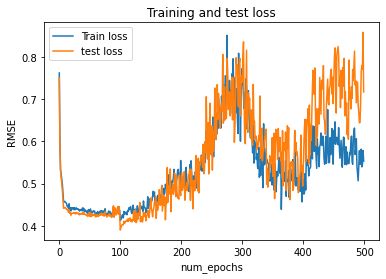

In [1]:
import pandas as pd
import numpy as np
#导入csv数据
import torch
import torch.nn as nn
from torch.utils import data
import matplotlib.pyplot as plt
from tqdm import tqdm#引入进度条

device=torch.device("cuda"if torch.cuda.is_available() else "cpu")
train_data=pd.read_csv('/content/drive/MyDrive/train.csv')
test_data=pd.read_csv("/content/drive/MyDrive/test.csv")
print(("train_data.shape",train_data.shape,"test_data.shape",test_data.shape))


# 看数据差距
[print(i) for i in train_data.columns if i  not in test_data.columns]


# 数据预处理->内存有限，需要选择好哪些特征,
# State都是CA;Summary是文本数据，分析有限就直接剔除，同理Address
all_features=pd.concat((train_data.iloc[:,4:-1],test_data.iloc[:,3:-1]))
# print(train_data.columns)->看一下那些列
print("all_features.shape",all_features.shape)


# 先看一下那些列有缺失值
miss_values_count=all_features.isnull().sum()
print(miss_values_count)
print(miss_values_count.loc[miss_values_count>0])



#缺失数据所占比例,缺失数据填零,和检测数据是否都NA都去掉了
total_data=np.product(all_features.shape)
miss_total=miss_values_count.sum()
print("miss_percent:",miss_total/total_data*100)
all_features = all_features.fillna(method='bfill', axis=0).fillna(0)
miss_values_count=all_features.isnull().sum()
print(miss_values_count.loc[miss_values_count>0])



# all_features中的数据有哪些类型,不是数值类型的取哪些
print(all_features.dtypes.unique())
print(all_features.dtypes[all_features.dtypes=='object'])
# 不是数值类型的数据unique数量
for in_object in all_features.dtypes[all_features.dtypes=='object'].index:
    print(in_object.ljust(20),len(all_features[in_object].unique()))#返回单词“banana”的 20 个字符长的左对齐版本：
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
features = list(numeric_features)
print(features)
features.extend(["Type","Cooling","Bedrooms"])
print(features)
all_features = all_features[features]
print(all_features.shape)
all_features = pd.get_dummies(all_features, dummy_na=True)
print(all_features.shape)


# to_tensor
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32,device=device)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32,device=device)
train_labels = torch.tensor(train_data['Sold Price'].values.reshape(-1,1), dtype=torch.float32,device=device)



in_features = train_features.shape[1]
class MLP(nn.Module):
    def __init__(self,in_features):
        super(MLP, self).__init__()
        self.model=nn.Sequential(
            nn.Linear(in_features,256),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(256,1)
        )
    def forward(self, x):
        x=self.model(x)
        return x

net=MLP(in_features=in_features).to(device)
# x=torch.randn(45664,in_features)
# print(net(x).shape)
# def get_net():
#     net = nn.Sequential(nn.Linear(in_features,512),nn.ReLU(),nn.Dropout(),nn.Linear(512,256),nn.ReLU(),nn.Dropout(),nn.Linear(256,128),nn.ReLU(),nn.Dropout(),nn.Linear(128,64),nn.ReLU(),nn.Dropout(),nn.Linear(64,32),nn.ReLU(),nn.Dropout(),nn.Linear(32,1))
#     return net
loss = nn.MSELoss()
# log_rmse
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

# 训练
train_ls, test_ls = [], []
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):

    train_iter = load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in tqdm(train_iter):
            X=X.to(device)
            y=y.to(device)
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))#注意cpu
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

# k折交叉验证
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]  
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
        if i==k-1:
          torch.save(net.state_dict(), "my_net{}.pth".format(i))
          print("保存成功")
    return train_l_sum / k, valid_l_sum / k

# 开始训练
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 0.1, 0.1, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')
plt.plot(range(len(train_ls)), train_ls, label='Train loss')
plt.plot(range(len(test_ls)), test_ls, label='test loss')
plt.xlabel("num_epochs")
plt.ylabel("RMSE")
plt.yscale = 'log'
plt.title("Training and test loss")
plt.legend()
plt.show()

不要dropout

('train_data.shape', (47439, 41), 'test_data.shape', (31626, 40))
Sold Price
all_features.shape (79065, 36)
Type                               0
Year built                      1942
Heating                        11513
Cooling                        15109
Parking                         1676
Lot                            22989
Bedrooms                        4598
Bathrooms                       5410
Full bathrooms                 12928
Total interior livable area     3878
Total spaces                    1667
Garage spaces                   1667
Region                             2
Elementary School               8493
Elementary School Score         8735
Elementary School Distance      8493
Middle School                  28277
Middle School Score            28279
Middle School Distance         28277
High School                     7174
High School Score               7784
High School Distance            7175
Flooring                       21927
Heating features               12548
Cool

100%|██████████| 593/593 [00:01<00:00, 539.37it/s]


折1，训练log rmse0.533701, 验证log rmse0.580753


100%|██████████| 593/593 [00:01<00:00, 554.08it/s]


折2，训练log rmse0.764163, 验证log rmse1.057808


100%|██████████| 593/593 [00:01<00:00, 549.79it/s]


折3，训练log rmse0.386148, 验证log rmse0.607542


100%|██████████| 593/593 [00:01<00:00, 550.53it/s]


折4，训练log rmse0.278613, 验证log rmse0.534450


100%|██████████| 593/593 [00:01<00:00, 548.94it/s]


折5，训练log rmse0.301729, 验证log rmse0.640887
保存成功
5-折验证: 平均训练log rmse: 0.452871, 平均验证log rmse: 0.684288


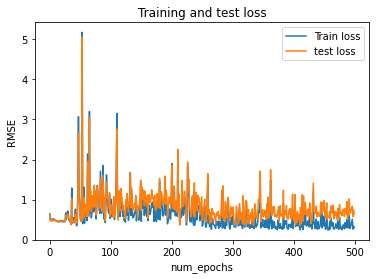

In [2]:
import pandas as pd
import numpy as np
#导入csv数据
import torch
import torch.nn as nn
from torch.utils import data
import matplotlib.pyplot as plt
from tqdm import tqdm#引入进度条

device=torch.device("cuda"if torch.cuda.is_available() else "cpu")
train_data=pd.read_csv('/content/drive/MyDrive/train.csv')
test_data=pd.read_csv("/content/drive/MyDrive/test.csv")
print(("train_data.shape",train_data.shape,"test_data.shape",test_data.shape))


# 看数据差距
[print(i) for i in train_data.columns if i  not in test_data.columns]


# 数据预处理->内存有限，需要选择好哪些特征,
# State都是CA;Summary是文本数据，分析有限就直接剔除，同理Address
all_features=pd.concat((train_data.iloc[:,4:-1],test_data.iloc[:,3:-1]))
# print(train_data.columns)->看一下那些列
print("all_features.shape",all_features.shape)


# 先看一下那些列有缺失值
miss_values_count=all_features.isnull().sum()
print(miss_values_count)
print(miss_values_count.loc[miss_values_count>0])



#缺失数据所占比例,缺失数据填零,和检测数据是否都NA都去掉了
total_data=np.product(all_features.shape)
miss_total=miss_values_count.sum()
print("miss_percent:",miss_total/total_data*100)
all_features = all_features.fillna(method='bfill', axis=0).fillna(0)
miss_values_count=all_features.isnull().sum()
print(miss_values_count.loc[miss_values_count>0])



# all_features中的数据有哪些类型,不是数值类型的取哪些
print(all_features.dtypes.unique())
print(all_features.dtypes[all_features.dtypes=='object'])
# 不是数值类型的数据unique数量
for in_object in all_features.dtypes[all_features.dtypes=='object'].index:
    print(in_object.ljust(20),len(all_features[in_object].unique()))#返回单词“banana”的 20 个字符长的左对齐版本：
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
features = list(numeric_features)
print(features)
features.extend(["Type","Cooling","Bedrooms"])
print(features)
all_features = all_features[features]
print(all_features.shape)
all_features = pd.get_dummies(all_features, dummy_na=True)
print(all_features.shape)


# to_tensor
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32,device=device)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32,device=device)
train_labels = torch.tensor(train_data['Sold Price'].values.reshape(-1,1), dtype=torch.float32,device=device)



in_features = train_features.shape[1]
class MLP(nn.Module):
    def __init__(self,in_features):
        super(MLP, self).__init__()
        self.model=nn.Sequential(
            nn.Linear(in_features,256),
            nn.ReLU(),
            
            nn.Linear(256,64),
            nn.ReLU(),
            
            nn.Linear(64,1)
        )
    def forward(self, x):
        x=self.model(x)
        return x

net=MLP(in_features=in_features).to(device)
# x=torch.randn(45664,in_features)
# print(net(x).shape)
# def get_net():
#     net = nn.Sequential(nn.Linear(in_features,512),nn.ReLU(),nn.Dropout(),nn.Linear(512,256),nn.ReLU(),nn.Dropout(),nn.Linear(256,128),nn.ReLU(),nn.Dropout(),nn.Linear(128,64),nn.ReLU(),nn.Dropout(),nn.Linear(64,32),nn.ReLU(),nn.Dropout(),nn.Linear(32,1))
#     return net
loss = nn.MSELoss()
# log_rmse
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

# 训练
train_ls, test_ls = [], []
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):

    train_iter = load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in tqdm(train_iter):
            X=X.to(device)
            y=y.to(device)
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))#注意cpu
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

# k折交叉验证
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]  
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
        if i==k-1:
          torch.save(net.state_dict(), "my_net{}.pth".format(i))
          print("保存成功")
    return train_l_sum / k, valid_l_sum / k

# 开始训练
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 0.1, 0.1, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')
plt.plot(range(len(train_ls)), train_ls, label='Train loss')
plt.plot(range(len(test_ls)), test_ls, label='test loss')
plt.xlabel("num_epochs")
plt.ylabel("RMSE")
plt.yscale = 'log'
plt.title("Training and test loss")
plt.legend()
plt.show()

少要点特征

('train_data.shape', (47439, 41), 'test_data.shape', (31626, 40))
Sold Price
all_features.shape (79065, 36)
Type                               0
Year built                      1942
Heating                        11513
Cooling                        15109
Parking                         1676
Lot                            22989
Bedrooms                        4598
Bathrooms                       5410
Full bathrooms                 12928
Total interior livable area     3878
Total spaces                    1667
Garage spaces                   1667
Region                             2
Elementary School               8493
Elementary School Score         8735
Elementary School Distance      8493
Middle School                  28277
Middle School Score            28279
Middle School Distance         28277
High School                     7174
High School Score               7784
High School Distance            7175
Flooring                       21927
Heating features               12548
Cool

100%|██████████| 593/593 [00:01<00:00, 560.68it/s]


折1，训练log rmse0.667330, 验证log rmse0.625119


100%|██████████| 593/593 [00:01<00:00, 552.28it/s]


折2，训练log rmse0.439851, 验证log rmse0.420114


100%|██████████| 593/593 [00:01<00:00, 541.22it/s]


折3，训练log rmse0.463010, 验证log rmse0.453451


100%|██████████| 593/593 [00:01<00:00, 560.05it/s]


折4，训练log rmse0.459585, 验证log rmse0.479533


100%|██████████| 593/593 [00:01<00:00, 560.94it/s]


折5，训练log rmse0.370845, 验证log rmse0.422210
保存成功
5-折验证: 平均训练log rmse: 0.480124, 平均验证log rmse: 0.480085


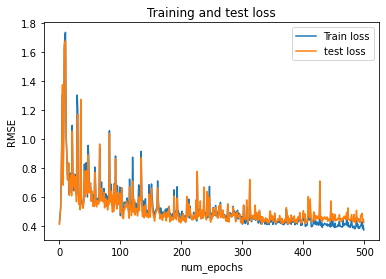

In [3]:
import pandas as pd
import numpy as np
#导入csv数据
import torch
import torch.nn as nn
from torch.utils import data
import matplotlib.pyplot as plt
from tqdm import tqdm#引入进度条

device=torch.device("cuda"if torch.cuda.is_available() else "cpu")
train_data=pd.read_csv('/content/drive/MyDrive/train.csv')
test_data=pd.read_csv("/content/drive/MyDrive/test.csv")
print(("train_data.shape",train_data.shape,"test_data.shape",test_data.shape))


# 看数据差距
[print(i) for i in train_data.columns if i  not in test_data.columns]


# 数据预处理->内存有限，需要选择好哪些特征,
# State都是CA;Summary是文本数据，分析有限就直接剔除，同理Address
all_features=pd.concat((train_data.iloc[:,4:-1],test_data.iloc[:,3:-1]))
# print(train_data.columns)->看一下那些列
print("all_features.shape",all_features.shape)


# 先看一下那些列有缺失值
miss_values_count=all_features.isnull().sum()
print(miss_values_count)
print(miss_values_count.loc[miss_values_count>0])



#缺失数据所占比例,缺失数据填零,和检测数据是否都NA都去掉了
total_data=np.product(all_features.shape)
miss_total=miss_values_count.sum()
print("miss_percent:",miss_total/total_data*100)
all_features = all_features.fillna(method='bfill', axis=0).fillna(0)
miss_values_count=all_features.isnull().sum()
print(miss_values_count.loc[miss_values_count>0])



# all_features中的数据有哪些类型,不是数值类型的取哪些
print(all_features.dtypes.unique())
print(all_features.dtypes[all_features.dtypes=='object'])
# 不是数值类型的数据unique数量
for in_object in all_features.dtypes[all_features.dtypes=='object'].index:
    print(in_object.ljust(20),len(all_features[in_object].unique()))#返回单词“banana”的 20 个字符长的左对齐版本：
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
features = list(numeric_features)
print(features)
features.extend([])
print(features)
all_features = all_features[features]
print(all_features.shape)
all_features = pd.get_dummies(all_features, dummy_na=True)
print(all_features.shape)


# to_tensor
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32,device=device)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32,device=device)
train_labels = torch.tensor(train_data['Sold Price'].values.reshape(-1,1), dtype=torch.float32,device=device)



in_features = train_features.shape[1]
class MLP(nn.Module):
    def __init__(self,in_features):
        super(MLP, self).__init__()
        self.model=nn.Sequential(
            nn.Linear(in_features,256),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(256,64),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(64,1)
        )
    def forward(self, x):
        x=self.model(x)
        return x

net=MLP(in_features=in_features).to(device)
# x=torch.randn(45664,in_features)
# print(net(x).shape)
# def get_net():
#     net = nn.Sequential(nn.Linear(in_features,512),nn.ReLU(),nn.Dropout(),nn.Linear(512,256),nn.ReLU(),nn.Dropout(),nn.Linear(256,128),nn.ReLU(),nn.Dropout(),nn.Linear(128,64),nn.ReLU(),nn.Dropout(),nn.Linear(64,32),nn.ReLU(),nn.Dropout(),nn.Linear(32,1))
#     return net
loss = nn.MSELoss()
# log_rmse
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

# 训练
train_ls, test_ls = [], []
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):

    train_iter = load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in tqdm(train_iter):
            X=X.to(device)
            y=y.to(device)
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))#注意cpu
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

# k折交叉验证
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]  
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
        if i==k-1:
          torch.save(net.state_dict(), "my_net{}.pth".format(i))
          print("保存成功")
    return train_l_sum / k, valid_l_sum / k

# 开始训练
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 0.1, 0.1, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')
plt.plot(range(len(train_ls)), train_ls, label='Train loss')
plt.plot(range(len(test_ls)), test_ls, label='test loss')
plt.xlabel("num_epochs")
plt.ylabel("RMSE")
plt.yscale = 'log'
plt.title("Training and test loss")
plt.legend()
plt.show()

weight_decay

('train_data.shape', (47439, 41), 'test_data.shape', (31626, 40))
Sold Price
all_features.shape (79065, 36)
Type                               0
Year built                      1942
Heating                        11513
Cooling                        15109
Parking                         1676
Lot                            22989
Bedrooms                        4598
Bathrooms                       5410
Full bathrooms                 12928
Total interior livable area     3878
Total spaces                    1667
Garage spaces                   1667
Region                             2
Elementary School               8493
Elementary School Score         8735
Elementary School Distance      8493
Middle School                  28277
Middle School Score            28279
Middle School Distance         28277
High School                     7174
High School Score               7784
High School Distance            7175
Flooring                       21927
Heating features               12548
Cool

100%|██████████| 593/593 [00:01<00:00, 524.96it/s]


折1，训练log rmse0.517778, 验证log rmse0.549315


100%|██████████| 593/593 [00:01<00:00, 502.35it/s]


折2，训练log rmse0.439998, 验证log rmse0.431649


100%|██████████| 593/593 [00:01<00:00, 529.17it/s]


折3，训练log rmse0.422916, 验证log rmse0.444021


100%|██████████| 593/593 [00:01<00:00, 530.81it/s]


折4，训练log rmse0.415342, 验证log rmse0.451080


100%|██████████| 593/593 [00:01<00:00, 527.94it/s]


折5，训练log rmse0.349652, 验证log rmse0.418208
保存成功


100%|██████████| 593/593 [00:01<00:00, 523.87it/s]


折1，训练log rmse0.382532, 验证log rmse0.405846


100%|██████████| 593/593 [00:01<00:00, 526.45it/s]


折2，训练log rmse0.382669, 验证log rmse0.395519


100%|██████████| 593/593 [00:01<00:00, 510.18it/s]


折3，训练log rmse0.400236, 验证log rmse0.409597


100%|██████████| 593/593 [00:01<00:00, 510.14it/s]


折4，训练log rmse0.384091, 验证log rmse0.415473


100%|██████████| 593/593 [00:01<00:00, 512.58it/s]


折5，训练log rmse0.358851, 验证log rmse0.412252
保存成功


100%|██████████| 593/593 [00:01<00:00, 516.56it/s]


折1，训练log rmse0.380720, 验证log rmse0.386020


100%|██████████| 593/593 [00:01<00:00, 508.39it/s]


折2，训练log rmse0.392867, 验证log rmse0.388399


100%|██████████| 593/593 [00:01<00:00, 512.20it/s]


折3，训练log rmse0.389222, 验证log rmse0.415364


100%|██████████| 593/593 [00:01<00:00, 504.92it/s]


折4，训练log rmse0.391430, 验证log rmse0.422083


100%|██████████| 593/593 [00:01<00:00, 496.97it/s]


折5，训练log rmse0.370387, 验证log rmse0.425487
保存成功


100%|██████████| 593/593 [00:01<00:00, 496.84it/s]


折1，训练log rmse0.379469, 验证log rmse0.386622


100%|██████████| 593/593 [00:01<00:00, 498.07it/s]


折2，训练log rmse0.386527, 验证log rmse0.387384


100%|██████████| 593/593 [00:01<00:00, 515.69it/s]


折3，训练log rmse0.388280, 验证log rmse0.397923


100%|██████████| 593/593 [00:01<00:00, 522.29it/s]


折4，训练log rmse0.388009, 验证log rmse0.415779


100%|██████████| 593/593 [00:01<00:00, 504.04it/s]


折5，训练log rmse0.366992, 验证log rmse0.418138
保存成功


100%|██████████| 593/593 [00:01<00:00, 513.78it/s]


折1，训练log rmse0.364619, 验证log rmse0.398791


100%|██████████| 593/593 [00:01<00:00, 509.44it/s]


折2，训练log rmse0.375236, 验证log rmse0.374967


100%|██████████| 593/593 [00:01<00:00, 503.27it/s]


折3，训练log rmse0.387716, 验证log rmse0.396738


100%|██████████| 593/593 [00:01<00:00, 507.38it/s]


折4，训练log rmse0.398255, 验证log rmse0.429151


100%|██████████| 593/593 [00:01<00:00, 512.50it/s]


折5，训练log rmse0.356925, 验证log rmse0.405646
保存成功


100%|██████████| 593/593 [00:01<00:00, 488.50it/s]


折1，训练log rmse0.383085, 验证log rmse0.395491


100%|██████████| 593/593 [00:01<00:00, 492.88it/s]


折2，训练log rmse0.381612, 验证log rmse0.378737


100%|██████████| 593/593 [00:01<00:00, 504.75it/s]


折3，训练log rmse0.366433, 验证log rmse0.372453


100%|██████████| 593/593 [00:01<00:00, 521.43it/s]


折4，训练log rmse0.381656, 验证log rmse0.410231


100%|██████████| 593/593 [00:01<00:00, 526.48it/s]


折5，训练log rmse0.345423, 验证log rmse0.403260
保存成功


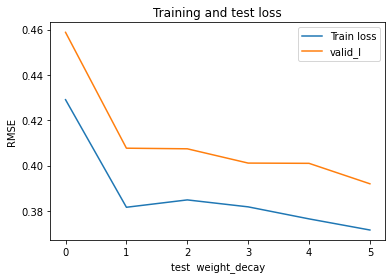

In [4]:
import pandas as pd
import numpy as np
#导入csv数据
import torch
import torch.nn as nn
from torch.utils import data
import matplotlib.pyplot as plt
from tqdm import tqdm#引入进度条

device=torch.device("cuda"if torch.cuda.is_available() else "cpu")
train_data=pd.read_csv('/content/drive/MyDrive/train.csv')
test_data=pd.read_csv("/content/drive/MyDrive/test.csv")
print(("train_data.shape",train_data.shape,"test_data.shape",test_data.shape))


# 看数据差距
[print(i) for i in train_data.columns if i  not in test_data.columns]


# 数据预处理->内存有限，需要选择好哪些特征,
# State都是CA;Summary是文本数据，分析有限就直接剔除，同理Address
all_features=pd.concat((train_data.iloc[:,4:-1],test_data.iloc[:,3:-1]))
# print(train_data.columns)->看一下那些列
print("all_features.shape",all_features.shape)


# 先看一下那些列有缺失值
miss_values_count=all_features.isnull().sum()
print(miss_values_count)
print(miss_values_count.loc[miss_values_count>0])



#缺失数据所占比例,缺失数据填零,和检测数据是否都NA都去掉了
total_data=np.product(all_features.shape)
miss_total=miss_values_count.sum()
print("miss_percent:",miss_total/total_data*100)
all_features = all_features.fillna(method='bfill', axis=0).fillna(0)
miss_values_count=all_features.isnull().sum()
print(miss_values_count.loc[miss_values_count>0])



# all_features中的数据有哪些类型,不是数值类型的取哪些
print(all_features.dtypes.unique())
print(all_features.dtypes[all_features.dtypes=='object'])
# 不是数值类型的数据unique数量
for in_object in all_features.dtypes[all_features.dtypes=='object'].index:
    print(in_object.ljust(20),len(all_features[in_object].unique()))#返回单词“banana”的 20 个字符长的左对齐版本：
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
features = list(numeric_features)
print(features)
features.extend(["Type","Cooling","Bedrooms"])
print(features)
all_features = all_features[features]
print(all_features.shape)
all_features = pd.get_dummies(all_features, dummy_na=True)
print(all_features.shape)


# to_tensor
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32,device=device)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32,device=device)
train_labels = torch.tensor(train_data['Sold Price'].values.reshape(-1,1), dtype=torch.float32,device=device)



in_features = train_features.shape[1]
class MLP(nn.Module):
    def __init__(self,in_features):
        super(MLP, self).__init__()
        self.model=nn.Sequential(
            nn.Linear(in_features,256),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(256,64),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(64,1)
        )
    def forward(self, x):
        x=self.model(x)
        return x

net=MLP(in_features=in_features).to(device)
# x=torch.randn(45664,in_features)
# print(net(x).shape)
# def get_net():
#     net = nn.Sequential(nn.Linear(in_features,512),nn.ReLU(),nn.Dropout(),nn.Linear(512,256),nn.ReLU(),nn.Dropout(),nn.Linear(256,128),nn.ReLU(),nn.Dropout(),nn.Linear(128,64),nn.ReLU(),nn.Dropout(),nn.Linear(64,32),nn.ReLU(),nn.Dropout(),nn.Linear(32,1))
#     return net
loss = nn.MSELoss()
# log_rmse
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

# 训练
train_ls, test_ls = [], []
xh_train_loss,xh_test_loss=[],[]
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):

    train_iter = load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in tqdm(train_iter):
            X=X.to(device)
            y=y.to(device)
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))#注意cpu
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

# k折交叉验证
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]  
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
        if i==k-1:
          torch.save(net.state_dict(), "my_net{}.pth".format(i))
          print("保存成功")
    return train_l_sum / k, valid_l_sum / k

# 开始训练
# k, num_epochs, lr, weight_decay, batch_size = 5, 100, 0.1, 0.1, 64
# train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
#                           weight_decay, batch_size)
# print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
#       f'平均验证log rmse: {float(valid_l):f}')
# plt.plot(range(len(train_ls)), train_ls, label='Train loss')
# plt.plot(range(len(test_ls)), test_ls, label='test loss')
# plt.xlabel("num_epochs")
# plt.ylabel("RMSE")
# plt.yscale = 'log'
# plt.title("Training and test loss")
# plt.legend()
# plt.show()
train_l,valid_l=[],[]
test_k=np.arange(10,70,10)
for i in test_k:
  k, num_epochs, lr, weight_decay, batch_size = 5, 100, 0.1, 0.0001*i, 64
  xh_train_l, xh_valid_l=0.0,0.0
  xh_train_l, xh_valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
  train_l.append(xh_train_l)
  valid_l.append(xh_valid_l)
plt.plot(range(len(train_l)), train_l, label='Train loss')
plt.plot(range(len(valid_l)), valid_l, label='valid_l')
plt.xlabel("test  weight_decay")
plt.ylabel("RMSE")
plt.yscale = 'log'
plt.title("Training and test loss")
plt.legend()
plt.show()

### 特征工程

In [21]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils import data
import matplotlib.pyplot as plt
from tqdm import tqdm#引入进度条
import seaborn as sns#画hot-map
import warnings


# 中文标签显示
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
pd.set_option('display.max_columns', None)    # 显示所有列
pd.set_option('display.max_rows', 200)        # 最多显示200行



#导入csv数据
device=torch.device("cuda"if torch.cuda.is_available() else "cpu")
train_data=pd.read_csv('/content/drive/MyDrive/train.csv')
test_data=pd.read_csv("/content/drive/MyDrive/test.csv")
print(("train_data.shape",train_data.shape,"test_data.shape",test_data.shape))


# 看数据train&data差距
[print(i) for i in train_data.columns if i  not in test_data.columns]


# 数据浅拷贝
train_copy=train_data.copy()
test_copy=test_data.copy()
print(train_copy.shape,test_copy.shape)


# 5行
train_copy.head()#train_copy[:5]




('train_data.shape', (47439, 41), 'test_data.shape', (31626, 40))
Sold Price
(47439, 41) (31626, 40)


,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Region,Elementary School,Elementary School Score,Elementary School Distance,Middle School,Middle School Score,Middle School Distance,High School,High School Score,High School Distance,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,"Ground Floor Bedroom, Master Bedroom on Ground...",0.0,NaN,1.0,0.0,0.0,Los Altos,Santa Rita Elementary School,7.0,0.4,NaN,NaN,NaN,Los Altos High School,8.0,1.3,"Tile, Hardwood, Carpet","Forced air, Gas",Central,"Dishwasher, Dryer, Garbage disposal, Microwave...","Washer / Dryer, Inside, In Utility Room","Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,3,2.0,2.0,872.0,1.0,1.0,Los Angeles,Raymond Avenue Elementary School,3.0,0.8,John Muir Middle School,2.0,1.1,Augustus F. Hawkins High A Critical Design And...,2.0,1.3,NaN,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...",NaN,Inside,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,2,3.0,1.0,1152.0,0.0,0.0,Strawberry,NaN,NaN,NaN,NaN,NaN,NaN,Long Barn High School,NaN,10.1,NaN,Forced air,NaN,NaN,NaN,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,5,3.0,3.0,2612.0,0.0,0.0,Culver City,Farragut Elementary School,9.0,0.2,Culver City Middle School,7.0,0.2,Culver City High School,8.0,0.2,"Wood, Tile",Central,Central Air,Dishwasher,"Stackable, Upper Level","Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creston,Santa Margarita Elementary School,6.0,8.5,Atascadero Middle School,5.0,10.2,Atascadero High School,6.0,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [15]:
# 看一下train和test各列的缺失比例,比例高于30%考虑删除
train_nan = pd.DataFrame(train_data.isnull().sum(), columns=['nan_sum'])
train_nan['percentage %'] = train_nan['nan_sum'] / train_data.shape[0] * 100
print(train_nan)
test_nan=pd.DataFrame(test_data.isnull().sum(),columns=['nan_sum'])
test_nan['percentage %'] = test_nan['nan_sum'] / test_data.shape[0] * 100
train_nan

                             nan_sum  percentage %
Id                                 0      0.000000
Address                            0      0.000000
Sold Price                         0      0.000000
Summary                          350      0.737790
Type                               0      0.000000
Year built                      1045      2.202829
Heating                         6465     13.628028
Cooling                        10622     22.390860
Parking                          908      1.914037
Lot                            14181     29.893126
Bedrooms                        2872      6.054091
Bathrooms                       3465      7.304117
Full bathrooms                  7865     16.579186
Total interior livable area     2526      5.324733
Total spaces                     916      1.930901
Garage spaces                    917      1.933009
Region                             2      0.004216
Elementary School               4742      9.995995
Elementary School Score        

,nan_sum,percentage %
Id,0,0.000000
Address,0,0.000000
Sold Price,0,0.000000
Summary,350,0.737790
Type,0,0.000000
Year built,1045,2.202829
Heating,6465,13.628028
Cooling,10622,22.390860
Parking,908,1.914037
Lot,14181,29.893126


### 探索性数据分析EDA


**相关性分析热地图**

city

bedroom num

构造关于“房间价格”的新特征

提取listed on的年份

score sum

构造新特征 time interval

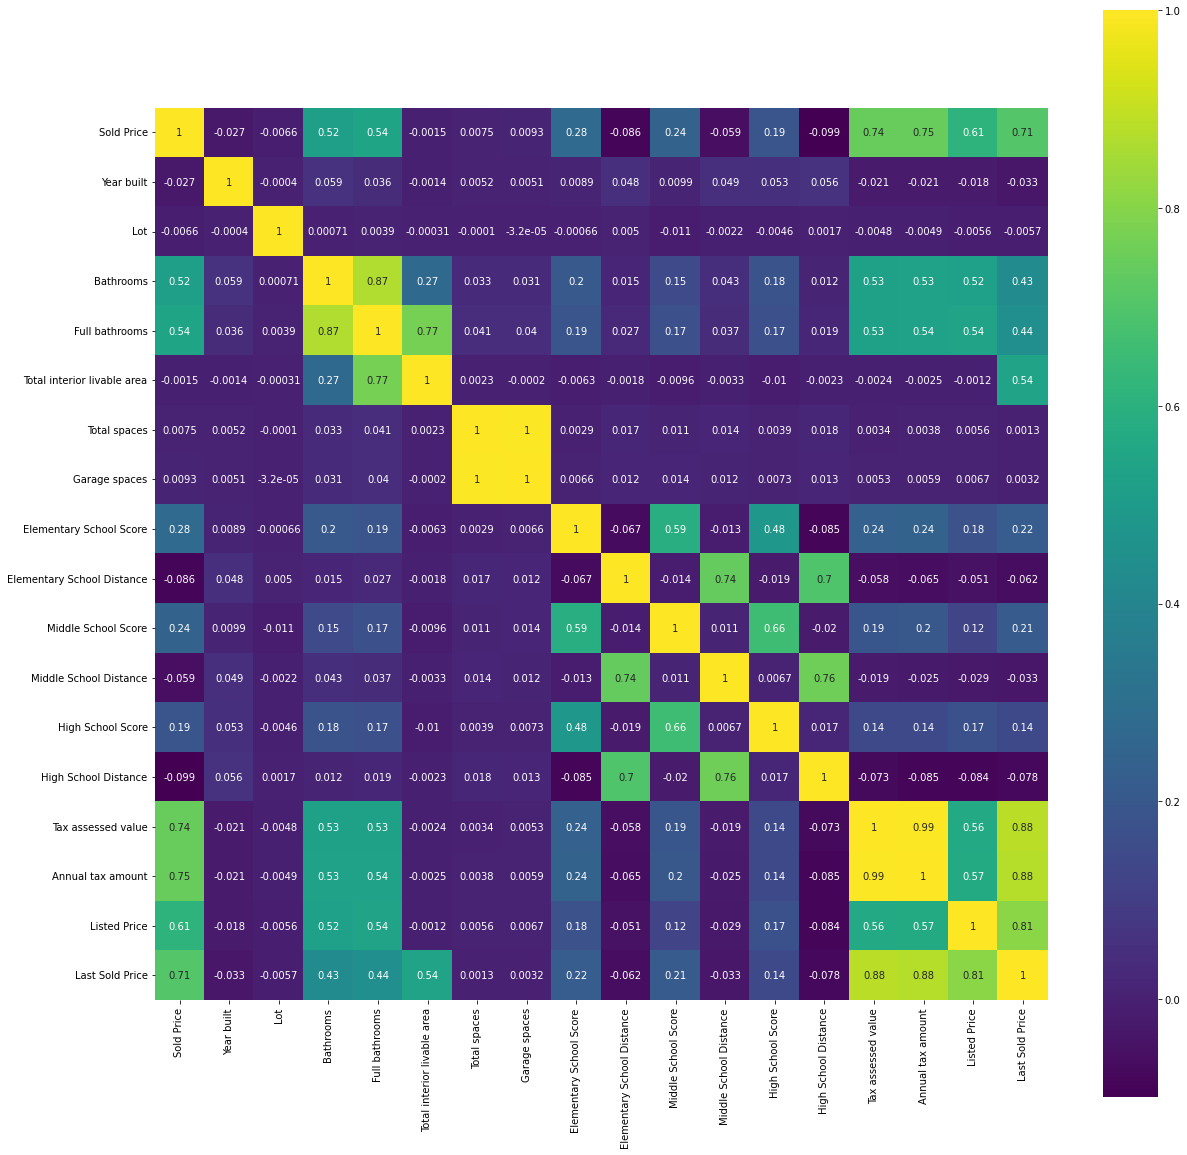

In [19]:
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize = (20,20))
sns.heatmap(train_copy.drop(['Id','Zip'],axis=1).corr(), square = True, cmap = colormap, 
            linecolor = 'white', annot = True)
plt.show()

train_data看一下有的数据类型和不是数值类型的数据unique数量

In [46]:
print(train_data.dtypes.unique())#dtype('O') ->Object
for in_object in train_data.dtypes[train_data.dtypes=='object'].index:
  print(in_object.ljust(20),len(train_data[in_object].unique()))#返回单词“banana”的 20 个字符长的左对齐版本：

[dtype('int64') dtype('O') dtype('float64')]
Address              47325
Summary              46789
Type                 158
Heating              1861
Cooling              542
Parking              5114
Bedrooms             265
Region               950
Elementary School    1718
Middle School        489
High School          631
Flooring             1349
Heating features     1123
Cooling features     313
Appliances included  4585
Laundry features     1977
Parking features     4961
Listed On            2467
Last Sold On         6114
City                 929
State                2


**city有929不同的这个one_hoone_hot,pd.factorize感觉都不是很好处理,但是我们可以发现一些城市的成交量很大而且价格变化很大,而一些成交量很小价格稳定,感觉city不是一个好的参数,感觉非数值类型都不是很好处理**


.value_counts()对每一列里的各类行计数,如果想得出的计数占比，可以加参数normalize=True：
https://zhuanlan.zhihu.com/p/29986906

pd.factorize,类似于one_hot,只不过是从0到大数值开始,先进来数值会比较小,这个元组包含两个array,分别是我们想要的数字,，以及原来的index，那些设备号，文章说map更好用
https://blog.csdn.net/ssswill/article/details/86555935 

929
Los Angeles      0.215983
San Jose         0.137081
San Francisco    0.104850
San Mateo        0.021775
Santa Clara      0.021607
                   ...   
Davis Creek      0.000021
Independence     0.000021
Mineral          0.000021
Redcrest         0.000021
Elk Grove        0.000021
Name: City, Length: 929, dtype: float64
0          0
1          1
2          2
3          3
4          4
        ... 
47434    927
47435     12
47436      1
47437    928
47438    924
Name: city id, Length: 47439, dtype: int64


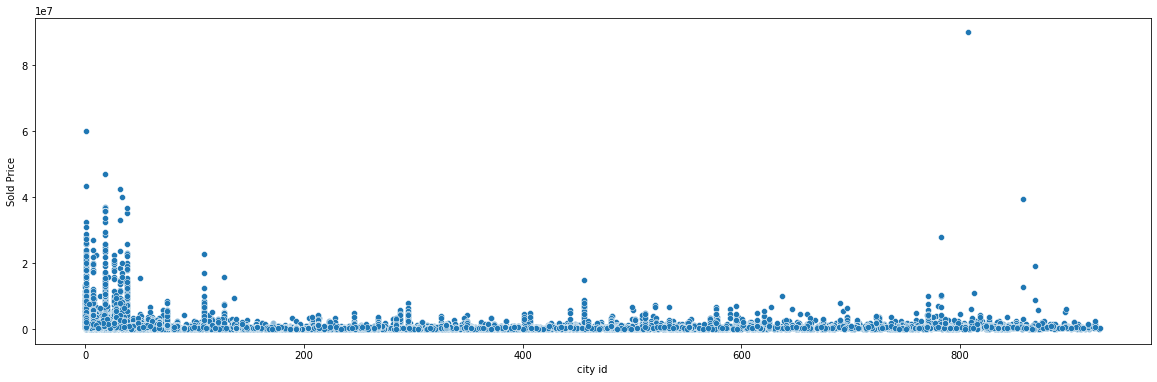

In [35]:
print(train_copy['City'].nunique())
print(train_copy['City'].value_counts(normalize=True)[:])
## city factorize
train_copy['city id'] = pd.factorize(train_copy['City'])[0] #https://blog.csdn.net/ssswill/article/details/86555935 ,说map更好用
print(train_copy['city id'])

plt.figure(figsize = (20, 6))
sns.scatterplot(data = train_copy, x = 'city id', y = 'Sold Price')
plt.show()

bedrooms 和city 一样被分成object


bedrooms,应该为数值类,存在两个问题,一缺值和字符串

pd.Series()Pandas Series 类似表格中的一个列（column），类似于一维数组，可以保存任何数据类型。

Series 由索引（index）和列组成
https://www.runoob.com/pandas/pandas-series.html

**sns.boxplot:我是没看懂** 
https://www.cntofu.com/book/172/docs/16.md


'bedroom num', 'Sold Price'的相关系数

count    37241.000000
mean         2.977525
std          1.282035
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         42.000000
Name: bedroom num, dtype: float64


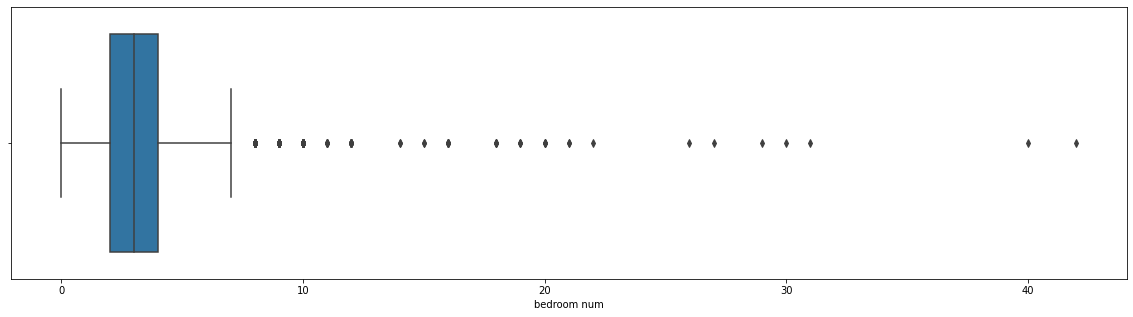

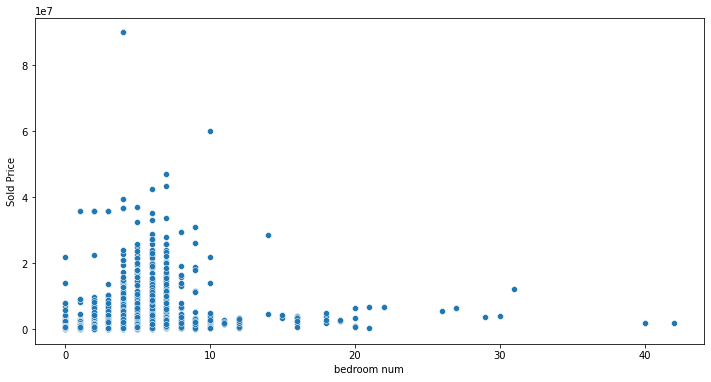

             bedroom num  Sold Price
bedroom num     1.000000    0.305958
Sold Price      0.305958    1.000000


,bedroom num,Sold Price
bedroom num,1.000000,0.280415
Sold Price,0.280415,1.000000


In [60]:
# 提取bedrooms 除去字符串之外的bedrooms分布
# 发现 卧室个数 均值为3
train_copy['bedroom num']=train_copy['Bedrooms'].fillna(24)
train_copy['bedroom num']=train_copy['bedroom num'].replace('[a-zA-z]',24,regex=True)
train_copy['bedroom num']=pd.Series(train_copy['bedroom num'],dtype=np.int)
train_bed_df=train_copy[train_copy['bedroom num']!=24]
print(train_bed_df['bedroom num'].describe())
plt.figure(figsize = (20,5))
sns.boxplot(x = train_bed_df['bedroom num'])
plt.show()


# 这个图有用吗?
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_bed_df, x='bedroom num', y='Sold Price')
plt.show()
# 相关系数
print(train_bed_df[['bedroom num', 'Sold Price']].corr())

## 接下来把train data上的bedroom_num==24的替换为3,相关系数
train_copy['bedroom num'] = train_copy['bedroom num'].replace(24, 3)
train_copy[['bedroom num','Sold Price']].corr()